In [881]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

### Загрузка датасетов

In [882]:
data_CA = pd.read_csv('data\\CAvideos.csv', encoding = 'KOI8-R')
data_CA.insert(len(data_CA.columns), 'country', 'CA')
data_DE = pd.read_csv('data\\DEvideos.csv', encoding = 'KOI8-R')
data_DE.insert(len(data_DE.columns), 'country', 'DE')
data_FR = pd.read_csv('data\\FRvideos.csv', encoding = 'KOI8-R')
data_FR.insert(len(data_FR.columns), 'country', 'FR')
data_GB = pd.read_csv('data\\GBvideos.csv', encoding = 'KOI8-R')
data_GB.insert(len(data_GB.columns), 'country', 'GB')
data_IN = pd.read_csv('data\\INvideos.csv', encoding = 'KOI8-R')
data_IN.insert(len(data_IN.columns), 'country', 'IN')
data_JP = pd.read_csv('data\\JPvideos.csv', encoding = 'KOI8-R')
data_JP.insert(len(data_JP.columns), 'country', 'JP')
data_KR = pd.read_csv('data\\KRvideos.csv', encoding = 'KOI8-R')
data_KR.insert(len(data_KR.columns), 'country', 'KR')
data_MX = pd.read_csv('data\\MXvideos.csv', encoding = 'KOI8-R')
data_MX.insert(len(data_MX.columns), 'country', 'MX')
data_RU = pd.read_csv('data\\RUvideos.csv', encoding = 'KOI8-R')
data_RU.insert(len(data_RU.columns), 'country', 'RU')
data_US = pd.read_csv('data\\USvideos.csv', encoding = 'KOI8-R')
data_US.insert(len(data_US.columns), 'country', 'US')

In [883]:
data_US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO Б√╤ \n\nSUBSCRIBE Б√╨ ...,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


Общий датасет

Код если не создавать столбец country. Однако я решил в общем датасете хранить информацию о стране. (Если есть способ сделать красивее, то подскажите

In [782]:
# paths = glob.glob('data/*.csv', recursive = True)
# sorted(paths)
# data = pd.concat([pd.read_csv(i, encoding = 'KOI8-R') for i in paths]) 


In [884]:
data = pd.concat([data_CA, data_DE, data_FR, data_GB, data_IN, data_JP, data_KR, data_MX, data_RU, data_US])
data = data.sample(frac = 1)
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
15773,mSXgbFjpv-0,18.08.02,SBI Clerk Prelims 2018 | Percentage % | Part 4...,Mahendra Guru : Online Videos For Govt. Exams,27,2018-02-07T05:42:03.000Z,"RRB|""SSCCHSL""|""UPPOLICE""|""SBICLERKPRELIMS2018""...",37420,3396,58,329,https://i.ytimg.com/vi/mSXgbFjpv-0/default.jpg,False,False,False,Click Here For PDF : http://www.mahendraguru.c...,IN
10026,SEYuDXdLqAg,18.03.01,MIS CANCIONES FAVORITAS del 2017! Mejores Top ...,SandraCiresArt,24,2018-01-02T20:00:03.000Z,"sandra cires|""SandraCiresArt""|""Sandra Cires Ar...",649985,64437,1086,15726,https://i.ytimg.com/vi/SEYuDXdLqAg/default.jpg,False,False,False,Suscrц╜bete y Nunca Mц║s Estarц║s Triste! Б├▓ ...,MX
12856,K9SLVzfX9fw,18.30.01,Л╒─К╧└ЙЁ═ К╖▄М≥■ ) К╛╢Л═° #1,М┌╓Л┼╓К╞╦,22,2018-01-27T16:14:43.000Z,[none],33271,937,25,382,https://i.ytimg.com/vi/K9SLVzfX9fw/default.jpg,False,False,False,NaN,KR
5375,JiTEtvL9hIo,17.10.12,Г▄▌Е°╨ | Game Of Hunting 58О╪┬Е╓╖Г╣░Е╠─О╪┴Ц─░T...,Е╓╖Е┼┤Г█╗Ф▓╜,1,2017-12-09T16:00:03.000Z,"И⌡╩Х╕√Е┼┤|""Е╓╖И≥╦И⌡╩Х╕√Е┼┤""|""Г▄▌Е°╨""|""Х│▄Е°╨""|...",113996,137,419,531,https://i.ytimg.com/vi/JiTEtvL9hIo/default.jpg,False,False,False,Thanks for watching the drama! Help more peopl...,DE
8680,OytAYEpUIns,17.27.12,п я─п╣п╪п╩п╣п╡я│п╨п╟я▐ я┘*п╫я┌п╟ п©п╬я┌п╬п©я┌п...,п░п╫п╟я┌п╬п╩п╦п╧ п╗п╟я─п╦п╧,23,2017-12-26T14:32:31.000Z,"я┬п╟я─п╦п╧|""я┬п╟я─п╦п╧ п╠п╩п╬пЁ""|""п╫п╬п╡п╬п╣ п...",379295,31272,1932,9496,https://i.ytimg.com/vi/OytAYEpUIns/default.jpg,False,False,False,п²п╬п╡п╬я│я┌п╦ п▒п∙п≈ п╫п╟я┬п╣пЁп╬ п╪п╫п╣п╫п╦я...,DE


In [827]:
data.shape

(375942, 17)

In [828]:
data.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

In [829]:
data.isna().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
country                       0
dtype: int64

In [885]:
data['description']=data['description'].fillna("")

Из 375942 данных 19478 видео не имеют описания, что составляет 5%. Предпологаем, что это не ошибка, а в видео действительно нет описания. В дальнейшем исследуем зависимость популярности видео от наличия описания.

**Немного модифицируем таблицу.** Пофиксим формат времени, разделим информацию с *publishing_time* на *publishing_time* и *publishing_date*. Также из json файлов получаем информацию о жанре видео.

In [886]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
data['publish_time'] = pd.to_datetime(data['publish_time'], format ='%Y-%m-%dT%H:%M:%S.%fZ')
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
15773,mSXgbFjpv-0,2018-02-08,SBI Clerk Prelims 2018 | Percentage % | Part 4...,Mahendra Guru : Online Videos For Govt. Exams,27,2018-02-07 05:42:03,"RRB|""SSCCHSL""|""UPPOLICE""|""SBICLERKPRELIMS2018""...",37420,3396,58,329,https://i.ytimg.com/vi/mSXgbFjpv-0/default.jpg,False,False,False,Click Here For PDF : http://www.mahendraguru.c...,IN
10026,SEYuDXdLqAg,2018-01-03,MIS CANCIONES FAVORITAS del 2017! Mejores Top ...,SandraCiresArt,24,2018-01-02 20:00:03,"sandra cires|""SandraCiresArt""|""Sandra Cires Ar...",649985,64437,1086,15726,https://i.ytimg.com/vi/SEYuDXdLqAg/default.jpg,False,False,False,Suscrц╜bete y Nunca Mц║s Estarц║s Triste! Б├▓ ...,MX
12856,K9SLVzfX9fw,2018-01-30,Л╒─К╧└ЙЁ═ К╖▄М≥■ ) К╛╢Л═° #1,М┌╓Л┼╓К╞╦,22,2018-01-27 16:14:43,[none],33271,937,25,382,https://i.ytimg.com/vi/K9SLVzfX9fw/default.jpg,False,False,False,,KR
5375,JiTEtvL9hIo,2017-12-10,Г▄▌Е°╨ | Game Of Hunting 58О╪┬Е╓╖Г╣░Е╠─О╪┴Ц─░T...,Е╓╖Е┼┤Г█╗Ф▓╜,1,2017-12-09 16:00:03,"И⌡╩Х╕√Е┼┤|""Е╓╖И≥╦И⌡╩Х╕√Е┼┤""|""Г▄▌Е°╨""|""Х│▄Е°╨""|...",113996,137,419,531,https://i.ytimg.com/vi/JiTEtvL9hIo/default.jpg,False,False,False,Thanks for watching the drama! Help more peopl...,DE
8680,OytAYEpUIns,2017-12-27,п я─п╣п╪п╩п╣п╡я│п╨п╟я▐ я┘*п╫я┌п╟ п©п╬я┌п╬п©я┌п...,п░п╫п╟я┌п╬п╩п╦п╧ п╗п╟я─п╦п╧,23,2017-12-26 14:32:31,"я┬п╟я─п╦п╧|""я┬п╟я─п╦п╧ п╠п╩п╬пЁ""|""п╫п╬п╡п╬п╣ п...",379295,31272,1932,9496,https://i.ytimg.com/vi/OytAYEpUIns/default.jpg,False,False,False,п²п╬п╡п╬я│я┌п╦ п▒п∙п≈ п╫п╟я┬п╣пЁп╬ п╪п╫п╣п╫п╦я...,DE


In [833]:
data.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
country                           object
dtype: object

In [887]:
data.insert(5, 'publish_date', data['publish_time'].dt.date)
data['publish_date'] = data['publish_date'].astype('datetime64[ns]')
data['publish_time'] = data['publish_time'].dt.time
data.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
country                           object
dtype: object

In [836]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
18635,0m49tMe3PPU,2018-06-03,Ц─░Ф┌╡Е═╠Ц─▒Е│╔Е╨╥Х╗╨Ф√╜Ц│╝Г╣░Ф·°Ц─│Е©┐Х┤⌠Ц│╚Г...,Ц┐°Ц┐ЁЦ┐°Ц┐ЁTV,26,2018-06-02,07:00:00,"Ц┐°Ц┐ЁЦ┐°Ц┐Ё|""BOMBOM""|""TV""|""Ц┐│Ц┐ёЦ┐ЁЦ┐█Ц┐╚""|""...",419446,5069,465,1637,https://i.ytimg.com/vi/0m49tMe3PPU/default.jpg,False,False,False,Б√╫Г╖│Ц│÷Ц│║Ц│╚Е╝÷И╗⌠Ц┐╩Ф╓°Х╗╪Ц│≈Ц│╕Ф╛╡Ц│≈Ц│└Ц...,JP
29119,-7_ATlZ-zMc,2018-04-17,Insta-Justice,Matt Bentkowski,17,2018-04-16,20:37:56,[none],504279,2540,53,184,https://i.ytimg.com/vi/-7_ATlZ-zMc/default.jpg,False,False,False,285 east to 400 traffic being slow as usual an...,CA
34176,V0qKRW82u2g,2018-05-12,п²п╟п╡п╟п╩я▄п╫я▀п╧: п·п╠ п╦п╫п╟я┐пЁя┐я─п╟я├п╦я...,п÷п╬п╩п╦я┌ SUN 2.0,25,2018-05-10,20:44:01,п≤п╫п╟я┐пЁя┐я─п╟я├п╦я▐ п©я┐я┌п╦п╫п╟,293449,8603,8356,2514,https://i.ytimg.com/vi/V0qKRW82u2g/default.jpg,False,False,False,п÷п╬п╢п©п╦я┬п╦я┌п╣я│я▄ п╫п╟ п╨п╟п╫п╟п╩ - https...,RU
15689,sUbLdSG2PJQ,2018-02-07,Ю╟╦Ю╠│Ю╟╝ Ю╟┘Ю╟╓Ю╠█Ю╟╓Ю╟≈Ю╟╬Ю╟╟Ю╠│ Ю╟ Ю╟╗Ю╟©Ю╟...,Tollywood Central,24,2018-02-06,07:04:11,"movie news|""latest film updates""|""telugu full ...",246022,326,104,13,https://i.ytimg.com/vi/sUbLdSG2PJQ/default.jpg,False,False,False,Tollywood Central FB: https://fb.com/tollywood...,IN
31786,AmBfT0ftFi0,2018-05-30,"К╟╘М┐└Л├▄К┘└К▀╗, М∙°Й╣╜ Й╟─Л┬≤ Л╣°Л╢┬ К╧▄КЁ╢К⌠...",Л╠└К└░A К┴╢Л┼╓,43,2018-05-29,02:17:21,"К┴╢Л┼╓|""Л┐│Л▀²""|""Л▀°Л┌╛""|""Л▀═К╛╦""|""Л²╢Л┼┬""|""Л═...",140701,783,99,407,https://i.ytimg.com/vi/AmBfT0ftFi0/default.jpg,False,False,False,Л║╟Л└═ М∙°Й╣╜Л√╢К║° К┘╦К·≤М∙≤К┼■ КЁ╢Л²╢ К╟╢К⌠°...,KR


Добавим информацию о том, через сколько времени алгоритмы ютуба сделали видео рекомендованным

In [888]:
data.insert(7, 'days_different', data['trending_date'] - data['publish_date'])

In [889]:
data['days_different'] = data['days_different'].dt.days.astype('int64')

In [839]:
import json

id_dict = {}

with open('data/US_category_id.json', 'r') as JSON:
    json_dict = json.load(JSON)
    for fields in json_dict['items']:
        id_dict[fields['id']] = fields['snippet']['title']
            
id_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [890]:
data.insert(len(data.columns), 'genre', pd.Series(id_dict[str(i)] for i in data['category_id']))

In [891]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,days_different,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,genre
15773,mSXgbFjpv-0,2018-02-08,SBI Clerk Prelims 2018 | Percentage % | Part 4...,Mahendra Guru : Online Videos For Govt. Exams,27,2018-02-07,05:42:03,1,"RRB|""SSCCHSL""|""UPPOLICE""|""SBICLERKPRELIMS2018""...",37420,3396,58,329,https://i.ytimg.com/vi/mSXgbFjpv-0/default.jpg,False,False,False,Click Here For PDF : http://www.mahendraguru.c...,IN,Music
10026,SEYuDXdLqAg,2018-01-03,MIS CANCIONES FAVORITAS del 2017! Mejores Top ...,SandraCiresArt,24,2018-01-02,20:00:03,1,"sandra cires|""SandraCiresArt""|""Sandra Cires Ar...",649985,64437,1086,15726,https://i.ytimg.com/vi/SEYuDXdLqAg/default.jpg,False,False,False,Suscrц╜bete y Nunca Mц║s Estarц║s Triste! Б├▓ ...,MX,Film & Animation
12856,K9SLVzfX9fw,2018-01-30,Л╒─К╧└ЙЁ═ К╖▄М≥■ ) К╛╢Л═° #1,М┌╓Л┼╓К╞╦,22,2018-01-27,16:14:43,3,[none],33271,937,25,382,https://i.ytimg.com/vi/K9SLVzfX9fw/default.jpg,False,False,False,,KR,Music
5375,JiTEtvL9hIo,2017-12-10,Г▄▌Е°╨ | Game Of Hunting 58О╪┬Е╓╖Г╣░Е╠─О╪┴Ц─░T...,Е╓╖Е┼┤Г█╗Ф▓╜,1,2017-12-09,16:00:03,1,"И⌡╩Х╕√Е┼┤|""Е╓╖И≥╦И⌡╩Х╕√Е┼┤""|""Г▄▌Е°╨""|""Х│▄Е°╨""|...",113996,137,419,531,https://i.ytimg.com/vi/JiTEtvL9hIo/default.jpg,False,False,False,Thanks for watching the drama! Help more peopl...,DE,Entertainment
8680,OytAYEpUIns,2017-12-27,п я─п╣п╪п╩п╣п╡я│п╨п╟я▐ я┘*п╫я┌п╟ п©п╬я┌п╬п©я┌п...,п░п╫п╟я┌п╬п╩п╦п╧ п╗п╟я─п╦п╧,23,2017-12-26,14:32:31,1,"я┬п╟я─п╦п╧|""я┬п╟я─п╦п╧ п╠п╩п╬пЁ""|""п╫п╬п╡п╬п╣ п...",379295,31272,1932,9496,https://i.ytimg.com/vi/OytAYEpUIns/default.jpg,False,False,False,п²п╬п╡п╬я│я┌п╦ п▒п∙п≈ п╫п╟я┬п╣пЁп╬ п╪п╫п╣п╫п╦я...,DE,Gaming


Добавим соотношение лайков к дизлайкам (рейтинг) и отсортируем по возрастанию

In [892]:
data.insert(0, 'rating', data['likes'] / ((data['dislikes'] + (data['likes']))))
data['rating'] = data['rating'].fillna(0)
data = data.sort_values(['rating', 'views'], ascending=False)

In [893]:
data.head()

,rating,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,days_different,tags,...,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,genre
38872,1.0,N1HAMUAXzbs,2018-06-14,Kris Wu Б─⌠ Like That (Official Music Video),Kris Wu,10,2018-05-22,15:05:18,23,"Kris Wu|""Wu Yi Fan""|""Е░╢Д╨╕Е┤║""|""fan shi""|""wuy...",...,123856,0,10903,https://i.ytimg.com/vi/N1HAMUAXzbs/default.jpg,False,False,False,Special thanks to Stella Maxwell.Get Б─°Like T...,GB,Music
38704,1.0,N1HAMUAXzbs,2018-06-13,Kris Wu Б─⌠ Like That (Official Music Video),Kris Wu,10,2018-05-22,15:05:18,22,"Kris Wu|""Wu Yi Fan""|""Е░╢Д╨╕Е┤║""|""fan shi""|""wuy...",...,112723,0,10840,https://i.ytimg.com/vi/N1HAMUAXzbs/default.jpg,False,False,False,Special thanks to Stella Maxwell.Get Б─°Like T...,GB,Music
38528,1.0,N1HAMUAXzbs,2018-06-12,Kris Wu Б─⌠ Like That (Official Music Video),Kris Wu,10,2018-05-22,15:05:18,21,"Kris Wu|""Wu Yi Fan""|""Е░╢Д╨╕Е┤║""|""fan shi""|""wuy...",...,103086,0,10730,https://i.ytimg.com/vi/N1HAMUAXzbs/default.jpg,False,False,False,Special thanks to Stella Maxwell.Get Б─°Like T...,GB,Nonprofits & Activism
38356,1.0,N1HAMUAXzbs,2018-06-11,Kris Wu Б─⌠ Like That (Official Music Video),Kris Wu,10,2018-05-22,15:05:18,20,"Kris Wu|""Wu Yi Fan""|""Е░╢Д╨╕Е┤║""|""fan shi""|""wuy...",...,100102,0,10612,https://i.ytimg.com/vi/N1HAMUAXzbs/default.jpg,False,False,False,Special thanks to Stella Maxwell.Get Б─°Like T...,GB,Comedy
38188,1.0,N1HAMUAXzbs,2018-06-10,Kris Wu Б─⌠ Like That (Official Music Video),Kris Wu,10,2018-05-22,15:05:18,19,"Kris Wu|""Wu Yi Fan""|""Е░╢Д╨╕Е┤║""|""fan shi""|""wuy...",...,99719,0,10591,https://i.ytimg.com/vi/N1HAMUAXzbs/default.jpg,False,False,False,Special thanks to Stella Maxwell.Get Б─°Like T...,GB,Gaming


In [894]:
data.shape

(375942, 21)

In [895]:
data_with_copies = data.copy()

In [896]:
data = data.sort_values(['video_id', 'trending_date'])

In [897]:
data_before_drop_bad_names = data.copy()

In [898]:
data_drop_bad_names = data.copy() # Без плохих имен + запоминает последнее появление видео в трендах

In [916]:
data_first_appearance = data.copy() # Хранит первое появление видео в трендах

In [917]:
data_first_appearance = data_first_appearance.drop_duplicates(subset = ['video_id', 'country'], keep = "first")
data_first_appearance = data_first_appearance.drop(index = data_first_appearance[data_first_appearance['video_id'] == '#NAME?'].index, axis = 0)
data_first_appearance = data_first_appearance.drop(index = data_first_appearance[data_first_appearance['video_id'] == '#VALUE!'].index, axis = 0)
data_first_appearance = data_first_appearance.sort_values(by=['rating', 'views'], ascending=False)

In [900]:
data_drop_bad_names = data_drop_bad_names.drop_duplicates(subset = ['video_id', 'country'], keep = "last")
data_drop_bad_names = data_drop_bad_names.drop(index = data_drop_bad_names[data_drop_bad_names['video_id'] == '#NAME?'].index, axis = 0)
data_drop_bad_names = data_drop_bad_names.drop(index = data_drop_bad_names[data_drop_bad_names['video_id'] == '#VALUE!'].index, axis = 0)
data_drop_bad_names = data_drop_bad_names.sort_values(by=['rating', 'views'], ascending=False)

In [899]:
data_with_copies[data_with_copies['description'] == '']

,rating,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,days_different,tags,...,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,genre
9757,1.0,G6XYrB8mgEA,2018-01-01,Ron DeSantis Talks Trump Tweet On Fox and Friends,Ron DeSantis,22,2017-12-27,16:00:33,5,[none],...,789,0,0,https://i.ytimg.com/vi/G6XYrB8mgEA/default.jpg,True,False,False,,RU,Entertainment
9949,1.0,wAS7WQUTy6Y,2018-01-02,п п╩п╦п© Gintama (AMV),Overnapis *,1,2017-12-28,11:34:18,5,"п╨п╩п╦п©|""Gintama""|""AMV""|""п╟п╫п╦п╪п╣""|""п╪я┐п╥я...",...,4,0,1,https://i.ytimg.com/vi/wAS7WQUTy6Y/default.jpg,False,False,False,,RU,Sports
8671,1.0,JUWU80SIS-M,2017-12-27,Lets Talk About love|Baaghi|Tiger Shroff|Shrad...,Prateek Singh Thakur,24,2017-12-19,03:28:25,8,"#dancelover#dancepartner#dancelife|""#tigershro...",...,30,0,0,https://i.ytimg.com/vi/JUWU80SIS-M/default.jpg,False,False,False,,RU,People & Blogs
1666,1.0,EYI3H5UliRQ,2017-11-23,[К╦■К²╫К╧└]М┐╓К█∙К⌠╓Л²≤ М┐°Л²╪ Й╟└Л╕²Л▀°Й╟└,ISGL,22,2017-11-22,11:16:54,1,[none],...,278,0,17,https://i.ytimg.com/vi/EYI3H5UliRQ/default.jpg,False,False,False,,KR,Entertainment
15704,1.0,DZI7tpizAWQ,2018-02-16,Л┬≤М≤╦К·▒ Й╟─Л▀°К┌≤,Nana Kim,22,2018-02-14,03:08:25,2,[none],...,339,0,6,https://i.ytimg.com/vi/DZI7tpizAWQ/default.jpg,False,False,False,,KR,Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25337,0.0,mcGBxTuKFGo,2018-03-22,#4. п╗п╡п╣п╧п╫п╬-п╡я▀я┬п╦п╡п╟п╩я▄п╫я▀п╣ п╠я┐п╢...,п°я▀я┬я┐п╩я▄п╨п╦п╫я▀ п╨я─п╣я│я┌п╦п╨п╦ п╦ п╩п╬я...,26,2018-03-22,03:00:03,0,"п╡я▀я┬п╦п╡п╨п╟ п╨я─п╣я│я┌п╬п╪|""flosstube""|""mau...",...,0,0,13,https://i.ytimg.com/vi/mcGBxTuKFGo/default.jpg,False,True,False,,RU,Entertainment
584,0.0,nqR7jkb3ehM,2017-11-16,Good vybz only,Georgia Webster,22,2017-10-23,16:38:31,24,[none],...,0,0,0,https://i.ytimg.com/vi/nqR7jkb3ehM/default.jpg,False,False,False,,CA,Entertainment
540,0.0,ECfCYqNmylM,2017-11-16,Good vybz only,Charlotte Blackburn,22,2017-10-23,19:13:40,24,[none],...,0,0,0,https://i.ytimg.com/vi/ECfCYqNmylM/default.jpg,False,False,False,,DE,Sports
539,0.0,x4gg6xe6MBk,2017-11-16,Good vybz only,Gracie Hardy,22,2017-10-23,16:57:43,24,[none],...,0,0,0,https://i.ytimg.com/vi/x4gg6xe6MBk/default.jpg,False,False,False,,FR,Entertainment


In [902]:
data_drop_bad_names.shape

(207123, 21)

Преобразования с таблицей закончены

### Статистика

In [903]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

#### Статистика видео, попавших в тренды в различных странах (одни и те же видео возможны в различных странах)

[0 1 2 3 4 5 6 7 8 9]


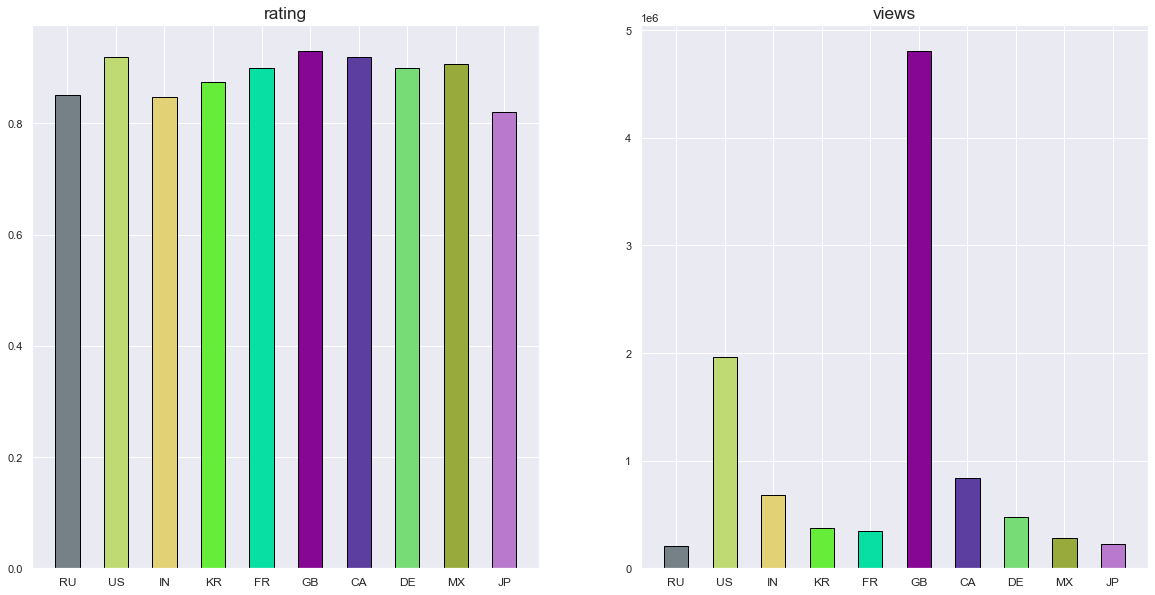

In [913]:
# only 2 properties in properties_list
def visualize_average_stats(df, country_list: list, properties_list: list):
    
# calculate average
    stats_common = []
    for property in properties_list:
        stat = []
        for country in country_list:
            stat.append(df[df['country']== country][property].agg('sum')/len(df[df['country']== country].index.unique()))           
        stats_common.append(stat)
        

# draw
    _, [ax1, ax2] = plt.subplots(ncols=2,nrows=1, figsize=(20,10))

    index = np.arange(len(country_list))
#     print(index)
    bar_width = 0.1
    opacity = 0.4

    def rdm():
        return (random.random(), random.random(), random.random())
    
    color_rdm = [rdm() for i in range(len(country_list))]
    for j, ax in enumerate([ax1, ax2]):
        ax.bar(index, stats_common[j], bar_width * 5, color=color_rdm, edgecolor='black')
        ax.set_title(properties_list[j], fontsize ='xx-large')
        ax.set_xticks(index)
        ax.set_xticklabels(country_list, fontsize ='large')
            

            
country_list = ['RU', 'US', 'IN', 'KR', 'FR', 'GB', 'CA', 'DE', 'MX', 'JP'] 
properties_list = ['rating', 'views']
visualize_average_stats(data_drop_bad_names, country_list, properties_list)

[0 1 2 3 4 5 6 7 8 9]


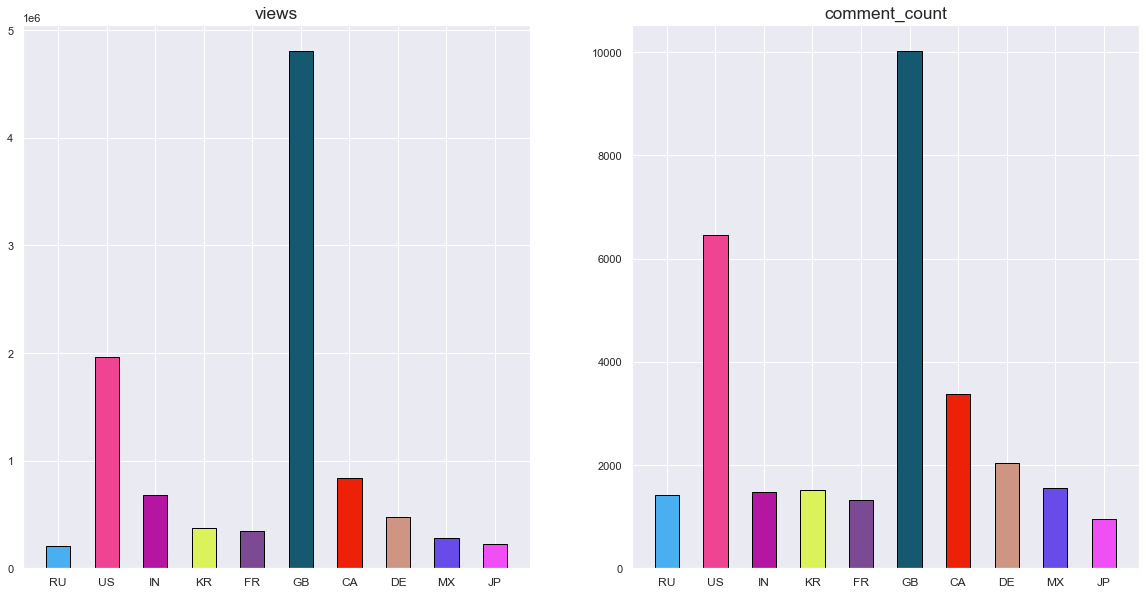

In [914]:
properties_list = ['views', 'comment_count']  
visualize_average_stats(data_drop_bad_names, country_list, properties_list)

[0 1 2 3 4 5 6 7 8 9]


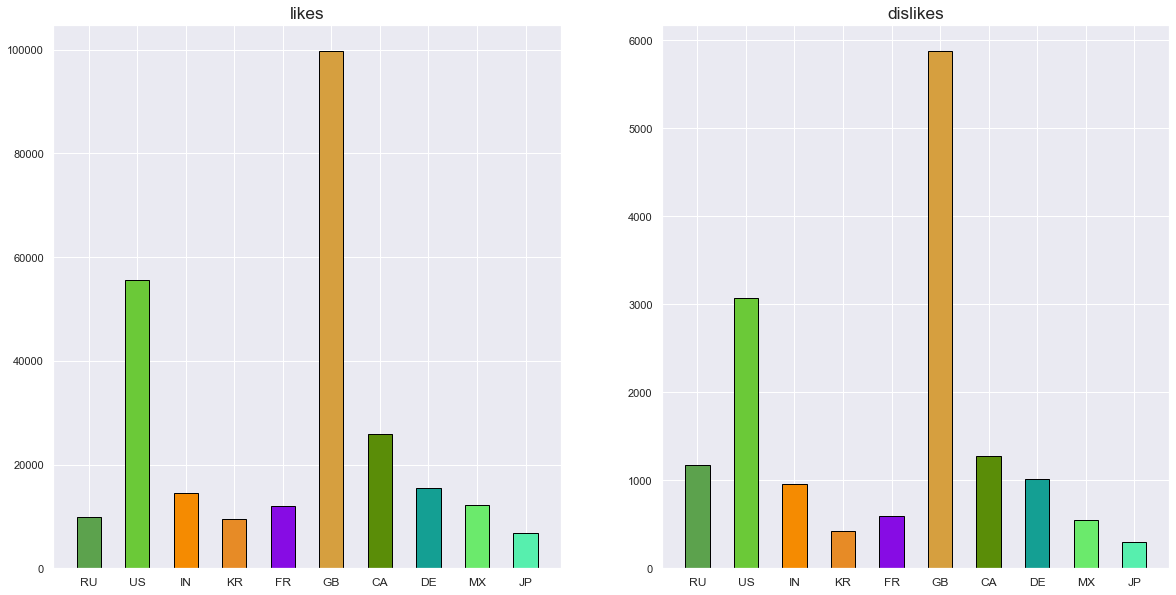

In [915]:
properties_list = ['likes', 'dislikes']  
visualize_average_stats(data_drop_bad_names, country_list, properties_list)

[0 1 2 3 4 5 6 7 8 9]


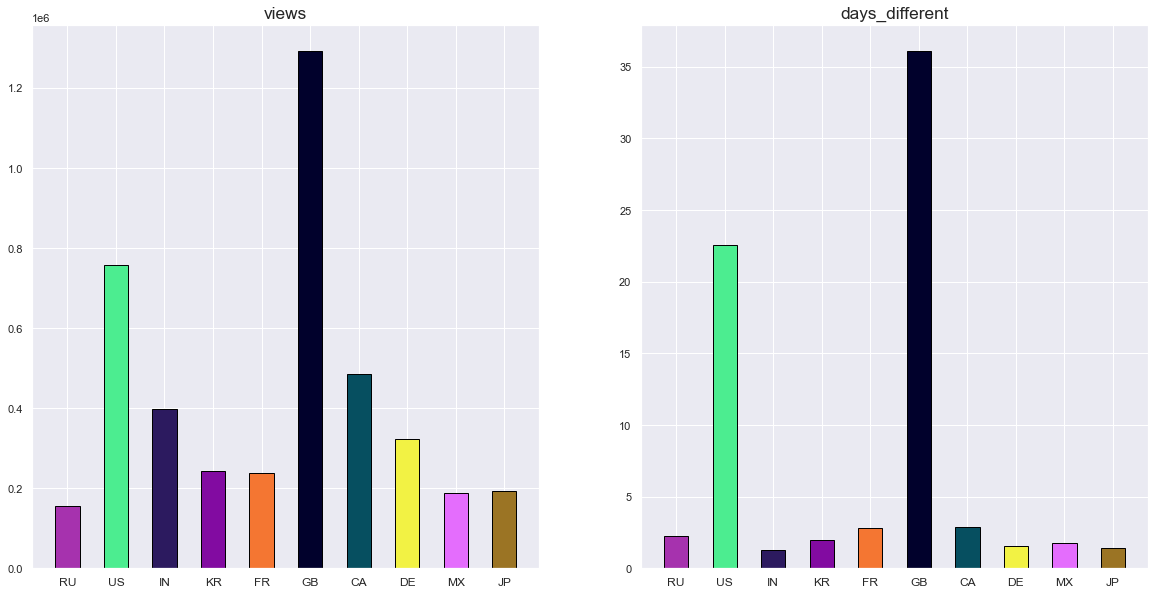

In [918]:
properties_list = ['views', 'days_different']  
visualize_average_stats(data_first_appearance, country_list, properties_list)

##### Статистика уникальных видео, попавших в тренды только в 1 страну (не учитывая пересечения)

In [935]:
data_no_inter = data_drop_bad_names.drop_duplicates(subset=['video_id'], keep = False)

[0 1 2 3 4 5 6 7 8 9]


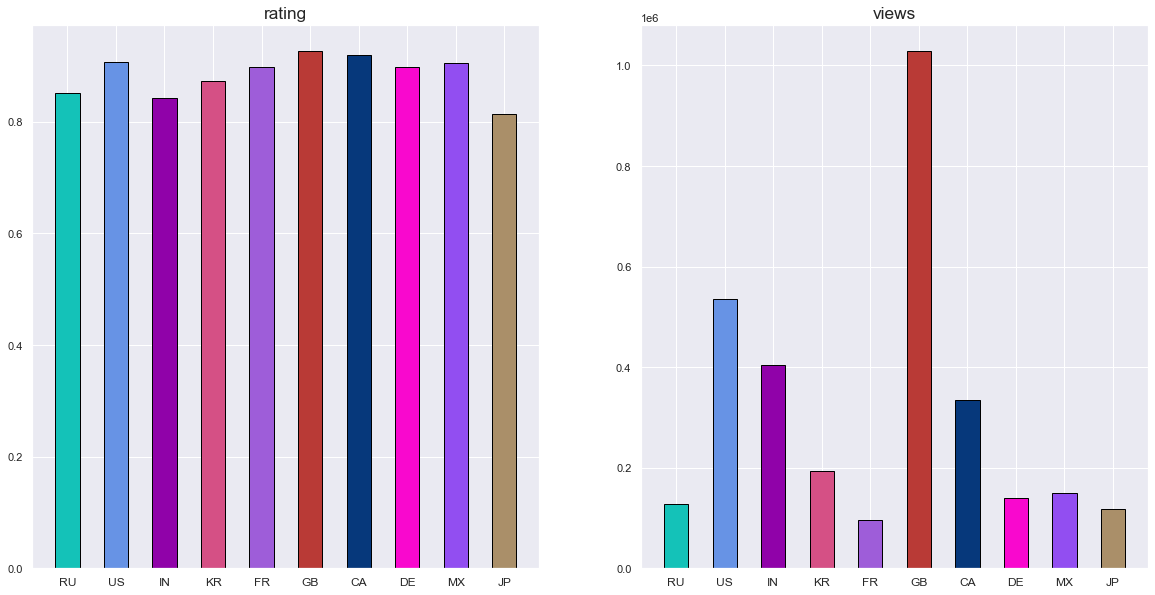

In [938]:
properties_list = ['rating', 'views']
visualize_average_stats(data_no_inter, country_list, properties_list)

[0 1 2 3 4 5 6 7 8 9]


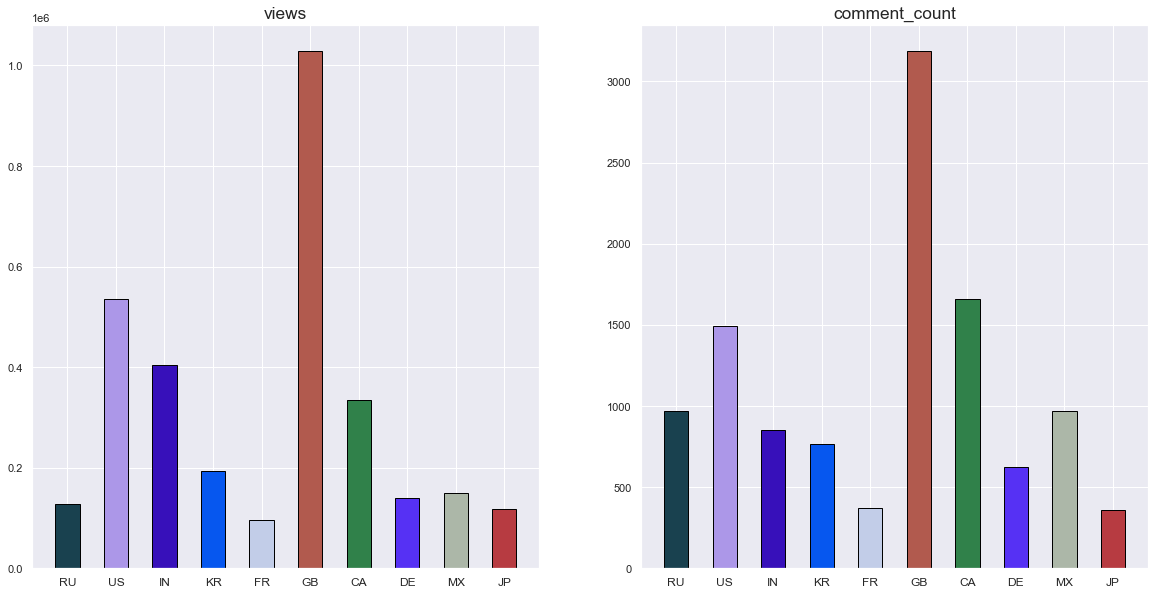

In [941]:
properties_list = ['views', 'comment_count']  
visualize_average_stats(data_no_inter, country_list, properties_list)

[0 1 2 3 4 5 6 7 8 9]


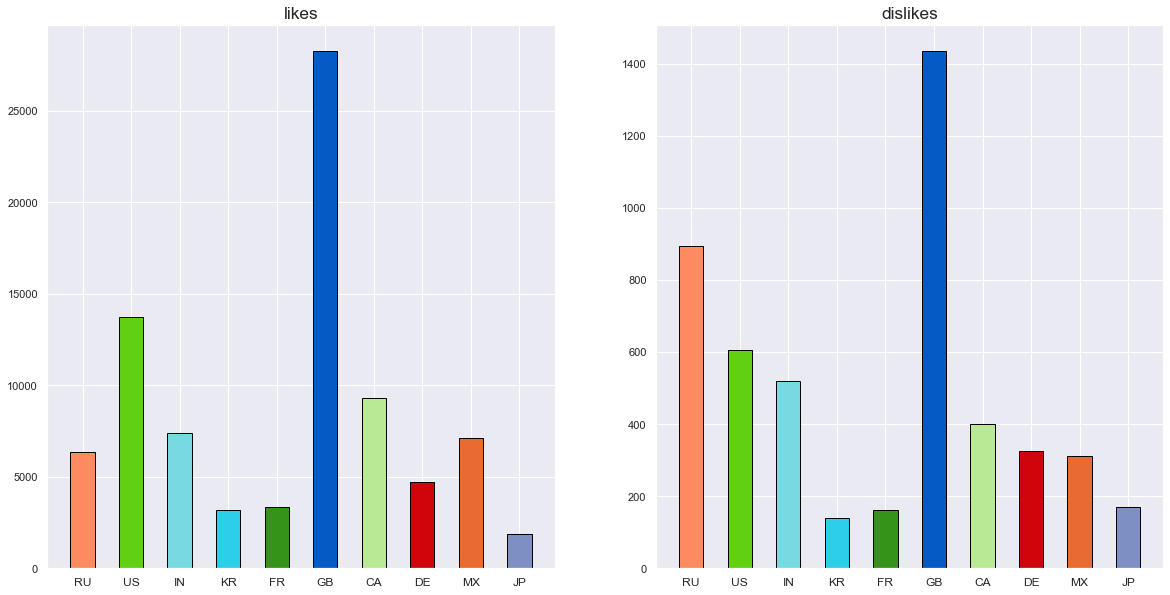

In [942]:
properties_list = ['likes', 'dislikes']  
visualize_average_stats(data_no_inter, country_list, properties_list)

In [943]:
data_fi_app = data_no_inter.copy()
data_fi_app = data_fi_app.drop_duplicates(subset = ['video_id', 'country'], keep = "first")
data_fi_app= data_fi_app.drop(index = data_fi_app[data_fi_app['video_id'] == '#NAME?'].index, axis = 0)
data_fi_app = data_fi_app.drop(index = data_fi_app[data_fi_app['video_id'] == '#VALUE!'].index, axis = 0)
data_fi_app = data_fi_app.sort_values(by=['rating', 'views'], ascending=False)

[0 1 2 3 4 5 6 7 8 9]


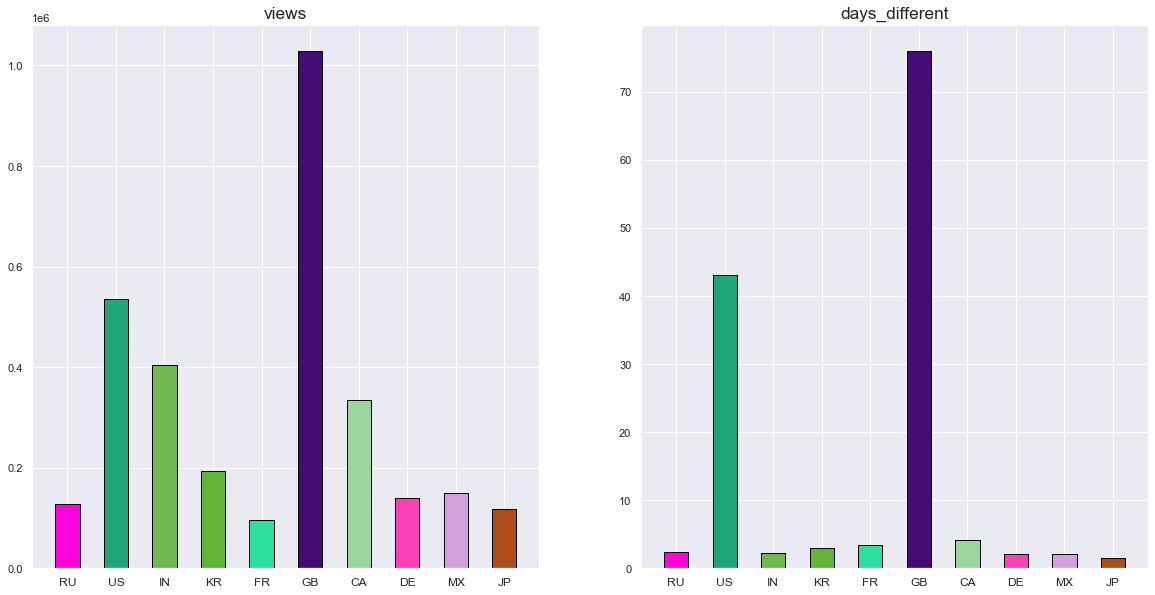

In [945]:
properties_list = ['views', 'days_different']  
visualize_average_stats(data_fi_app, country_list, properties_list)

Сравним влияние того, что видео попадает в тренды в нескольких странах более наглядно

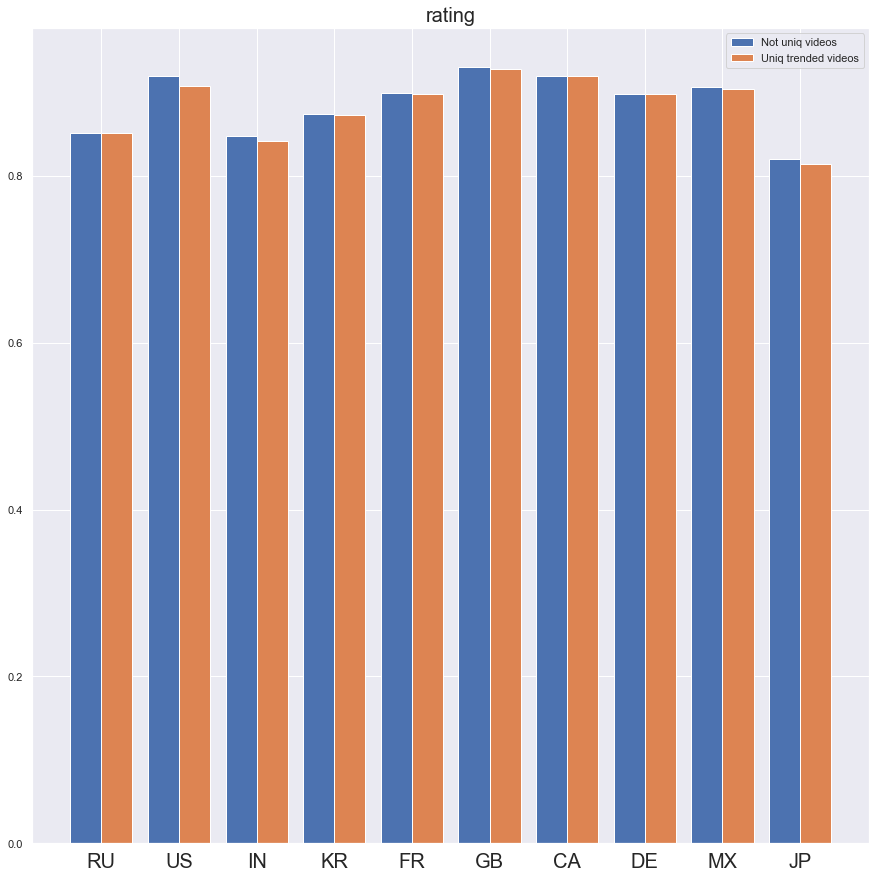

In [973]:
# only 2 properties in properties_list
def compare_visualize_average_stats(df, df_uniq, country_list: list, properties_list: list):
    
# calculate average
    stats_common = []
    stats_common_uniq = []
    for property in properties_list:
        stat = []
        stat_uniq = []
        for country in country_list:
            stat.append(df[df['country']== country][property].agg('sum')/len(df[df['country']== country].index.unique())) 
            stat_uniq.append(df_uniq[df_uniq['country']== country][property].agg('sum')/len(df_uniq[df_uniq['country']== country].index.unique())) 
        stats_common.append(stat)
        stats_common_uniq.append(stat_uniq)
        

# draw


    index = np.arange(len(country_list))
    plt.figure(figsize=(15,15))
    plt.bar(index - 0.2, stats_common[0], 0.4, label = 'Not uniq videos')
    plt.bar(index + 0.2, stats_common_uniq[0], 0.4, label = 'Uniq trended videos') 

    plt.xticks(index, country_list, fontsize =20)
    plt.legend()
    plt.title(properties_list[0], fontsize =20)
    plt.show()            

            
country_list = ['RU', 'US', 'IN', 'KR', 'FR', 'GB', 'CA', 'DE', 'MX', 'JP'] 
properties_list = ['rating']
compare_visualize_average_stats(data_drop_bad_names,data_no_inter, country_list, properties_list)


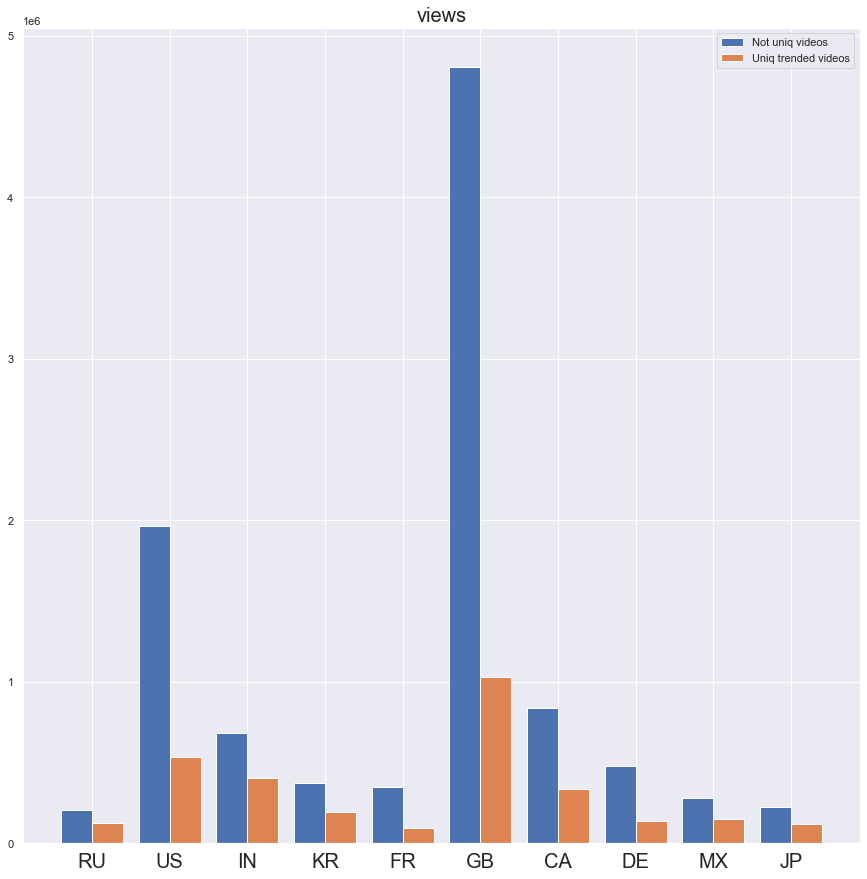

In [974]:
properties_list = ['views']
compare_visualize_average_stats(data_drop_bad_names,data_no_inter, country_list, properties_list)

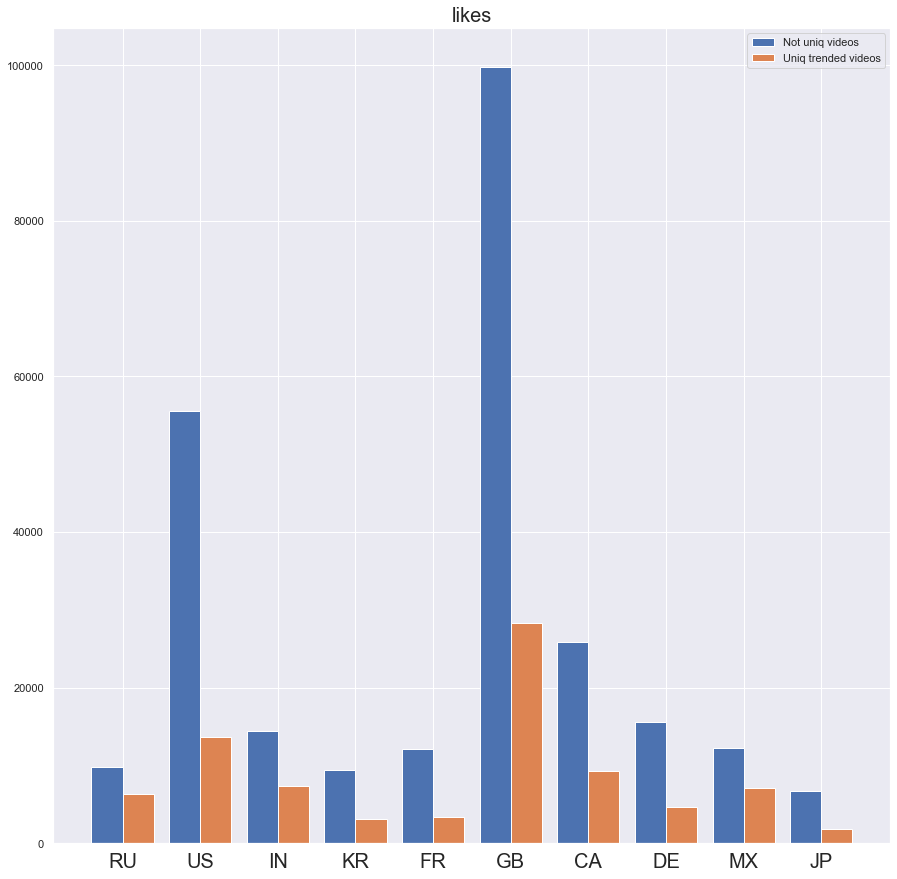

In [975]:
properties_list = ['likes']
compare_visualize_average_stats(data_drop_bad_names,data_no_inter, country_list, properties_list)

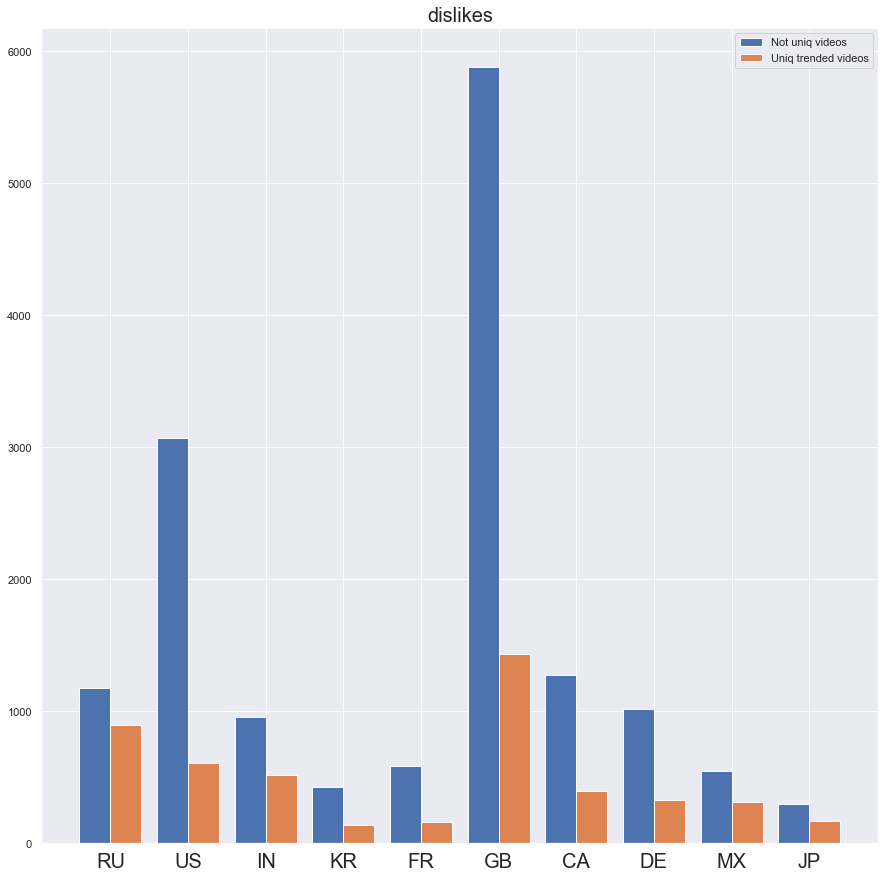

In [976]:
properties_list = ['dislikes']
compare_visualize_average_stats(data_drop_bad_names,data_no_inter, country_list, properties_list)

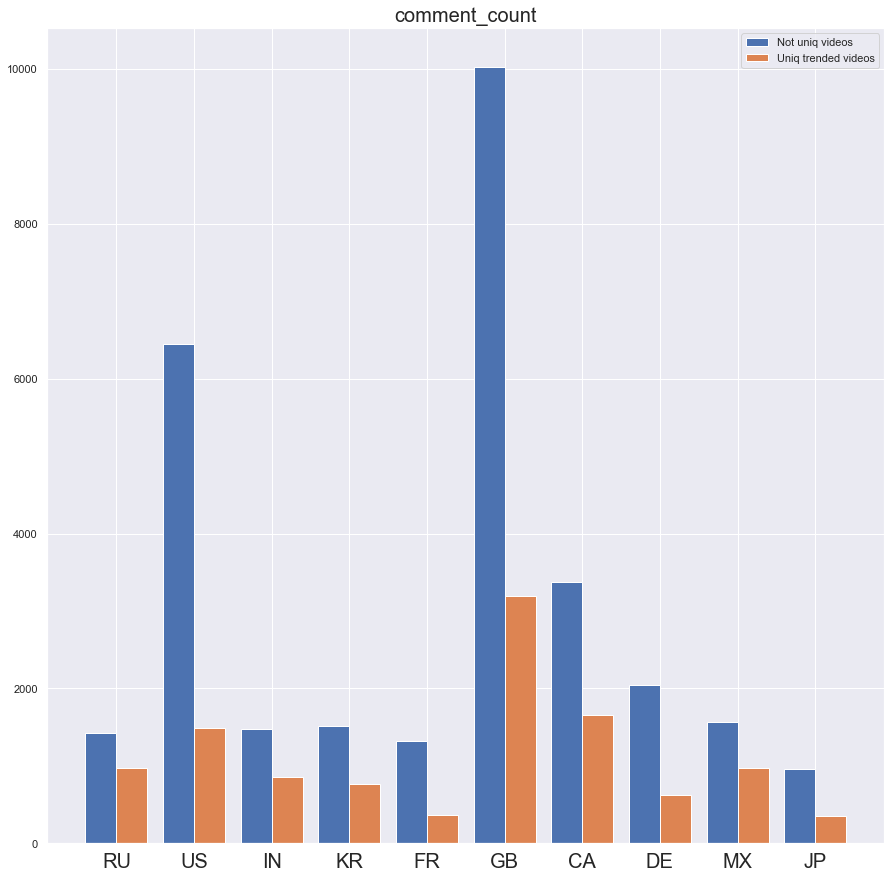

In [978]:
properties_list = ['comment_count']
compare_visualize_average_stats(data_drop_bad_names,data_no_inter, country_list, properties_list)

##### Статистика самых популярных видео среди всех данных

Датасет без повторений видео

In [979]:
data_no_duplicates = data.copy()
data_no_duplicates = data_no_duplicates.sort_values('views')
data_no_duplicates = data_no_duplicates.drop_duplicates(subset = ['video_id'], keep = "last")

In [985]:
data_no_duplicates.sort_values('likes', ascending = False).head(7)

,rating,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,days_different,tags,...,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,genre
36638,0.964456,7C2z4GqqS5E,2018-06-01,BTS (К╟╘М┐└Л├▄К┘└К▀╗) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18,09:00:02,14,"BIGHIT|""К╧┘М·┬М┼╦""|""К╟╘М┐└Л├▄К┘└К▀╗""|""BTS""|""BA...",...,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (К╟╘М┐└Л├▄К┘└К▀╗) 'FAKE LOVE' Official MVD...,GB,Entertainment
38401,0.934781,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06,04:00:07,36,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",...,5444541,379862,553371,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,Б─°This is AmericaБ─² by Childish Gambino http...,GB,News & Politics
25936,0.975861,xpVfcZ0ZcFM,2018-03-25,Drake - GodБ─≥s Plan,DrakeVEVO,10,2018-02-17,05:00:01,36,"Drake new music|""Drake Gods Plan""|""Drake GodБ─...",...,4737873,117198,301756,https://i.ytimg.com/vi/xpVfcZ0ZcFM/default.jpg,False,False,False,GodБ─≥s Plan (Official Video)\n\nSong Availabl...,GB,Entertainment
25545,0.946643,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,10,2018-02-15,00:00:03,36,"Bad|""Bunny""|""Bad Bunny""|""Video Oficial""|""Music...",...,3823879,215530,225216,https://i.ytimg.com/vi/kLpH1nSLJSs/default.jpg,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,GB,Comedy
35720,0.957657,ffxKSjUwKdU,2018-05-26,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20,04:00:03,36,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",...,3394437,150086,259613,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,GB,Howto & Style
8189,0.653923,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06,17:58:51,18,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",...,3312868,1753274,845233,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",GB,Entertainment
4784,0.980802,kTlv5_Bs8aw,2017-12-07,BTS (К╟╘М┐└Л├▄К┘└К▀╗) 'MIC Drop (Steve Aoki Re...,ibighit,10,2017-11-24,09:00:02,13,"BIGHIT|""К╧┘М·┬М┼╦""|""К╟╘М┐└Л├▄К┘└К▀╗""|""BTS""|""BA...",...,2960250,57944,556154,https://i.ytimg.com/vi/kTlv5_Bs8aw/default.jpg,False,False,False,BTS (К╟╘М┐└Л├▄К┘└К▀╗) 'MIC Drop (Steve Aoki Re...,GB,News & Politics


In [813]:
def visualize_for_video(my_df, column, num=10): # getting the top 10 videos by default
    sorted_df = []
    sorted_df = my_df.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar(figsize=(30,20),fontsize=25)
    print(type(ax))    
  
    labels = []
 
    index = np.arange(num)
    for item in sorted_df['title']:
        labels.append(item[:20] + '...')        
 
    ax.set_xticklabels(labels, rotation=45, fontsize=25)
    ax.bar(index,sorted_df[column],color = (random.random(), random.random(), random.random()), edgecolor='black')
    ax.set_title(column, fontsize =40)
    
    plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


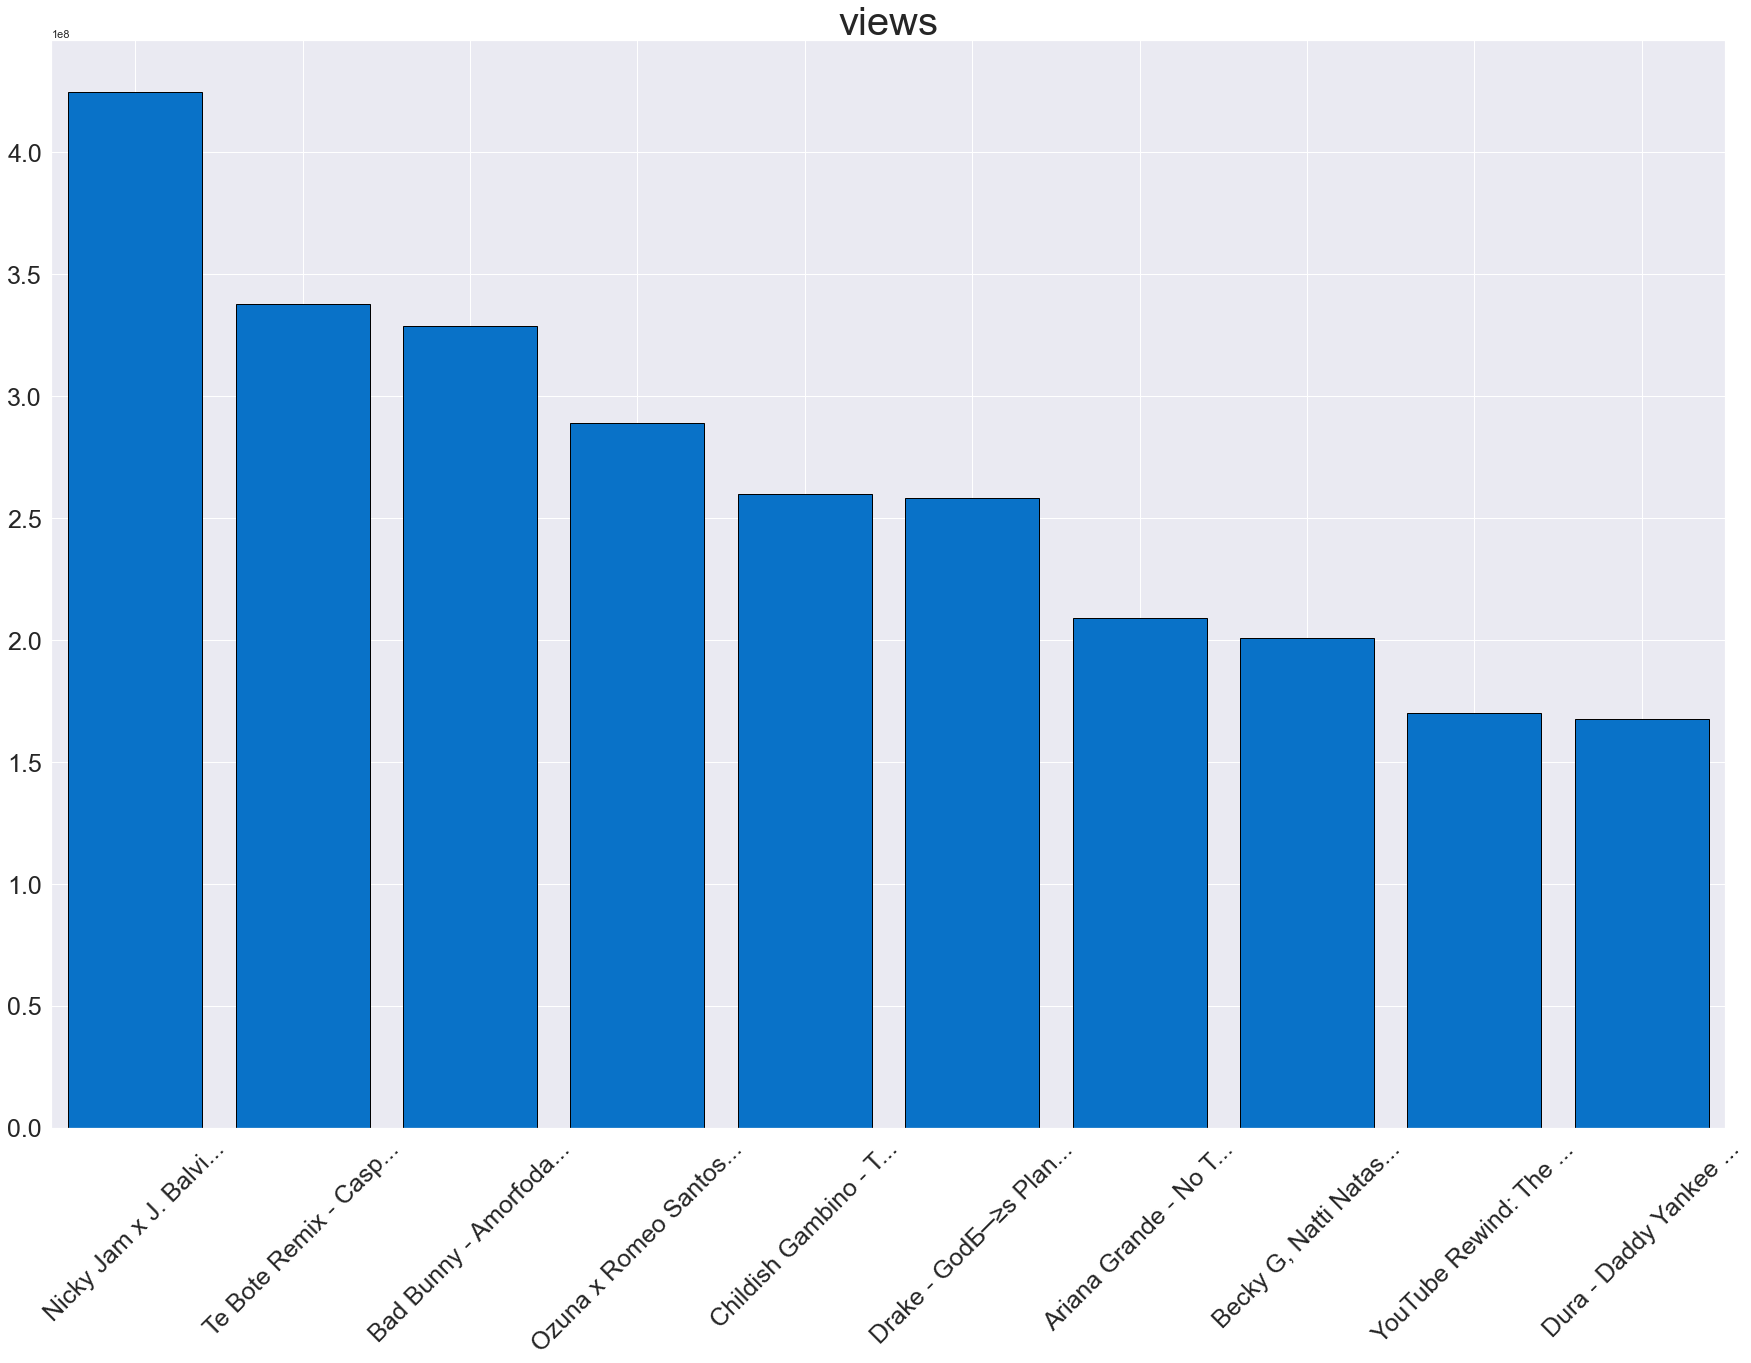

In [814]:
visualize_for_video(data_no_duplicates, 'views')

<class 'matplotlib.axes._subplots.AxesSubplot'>


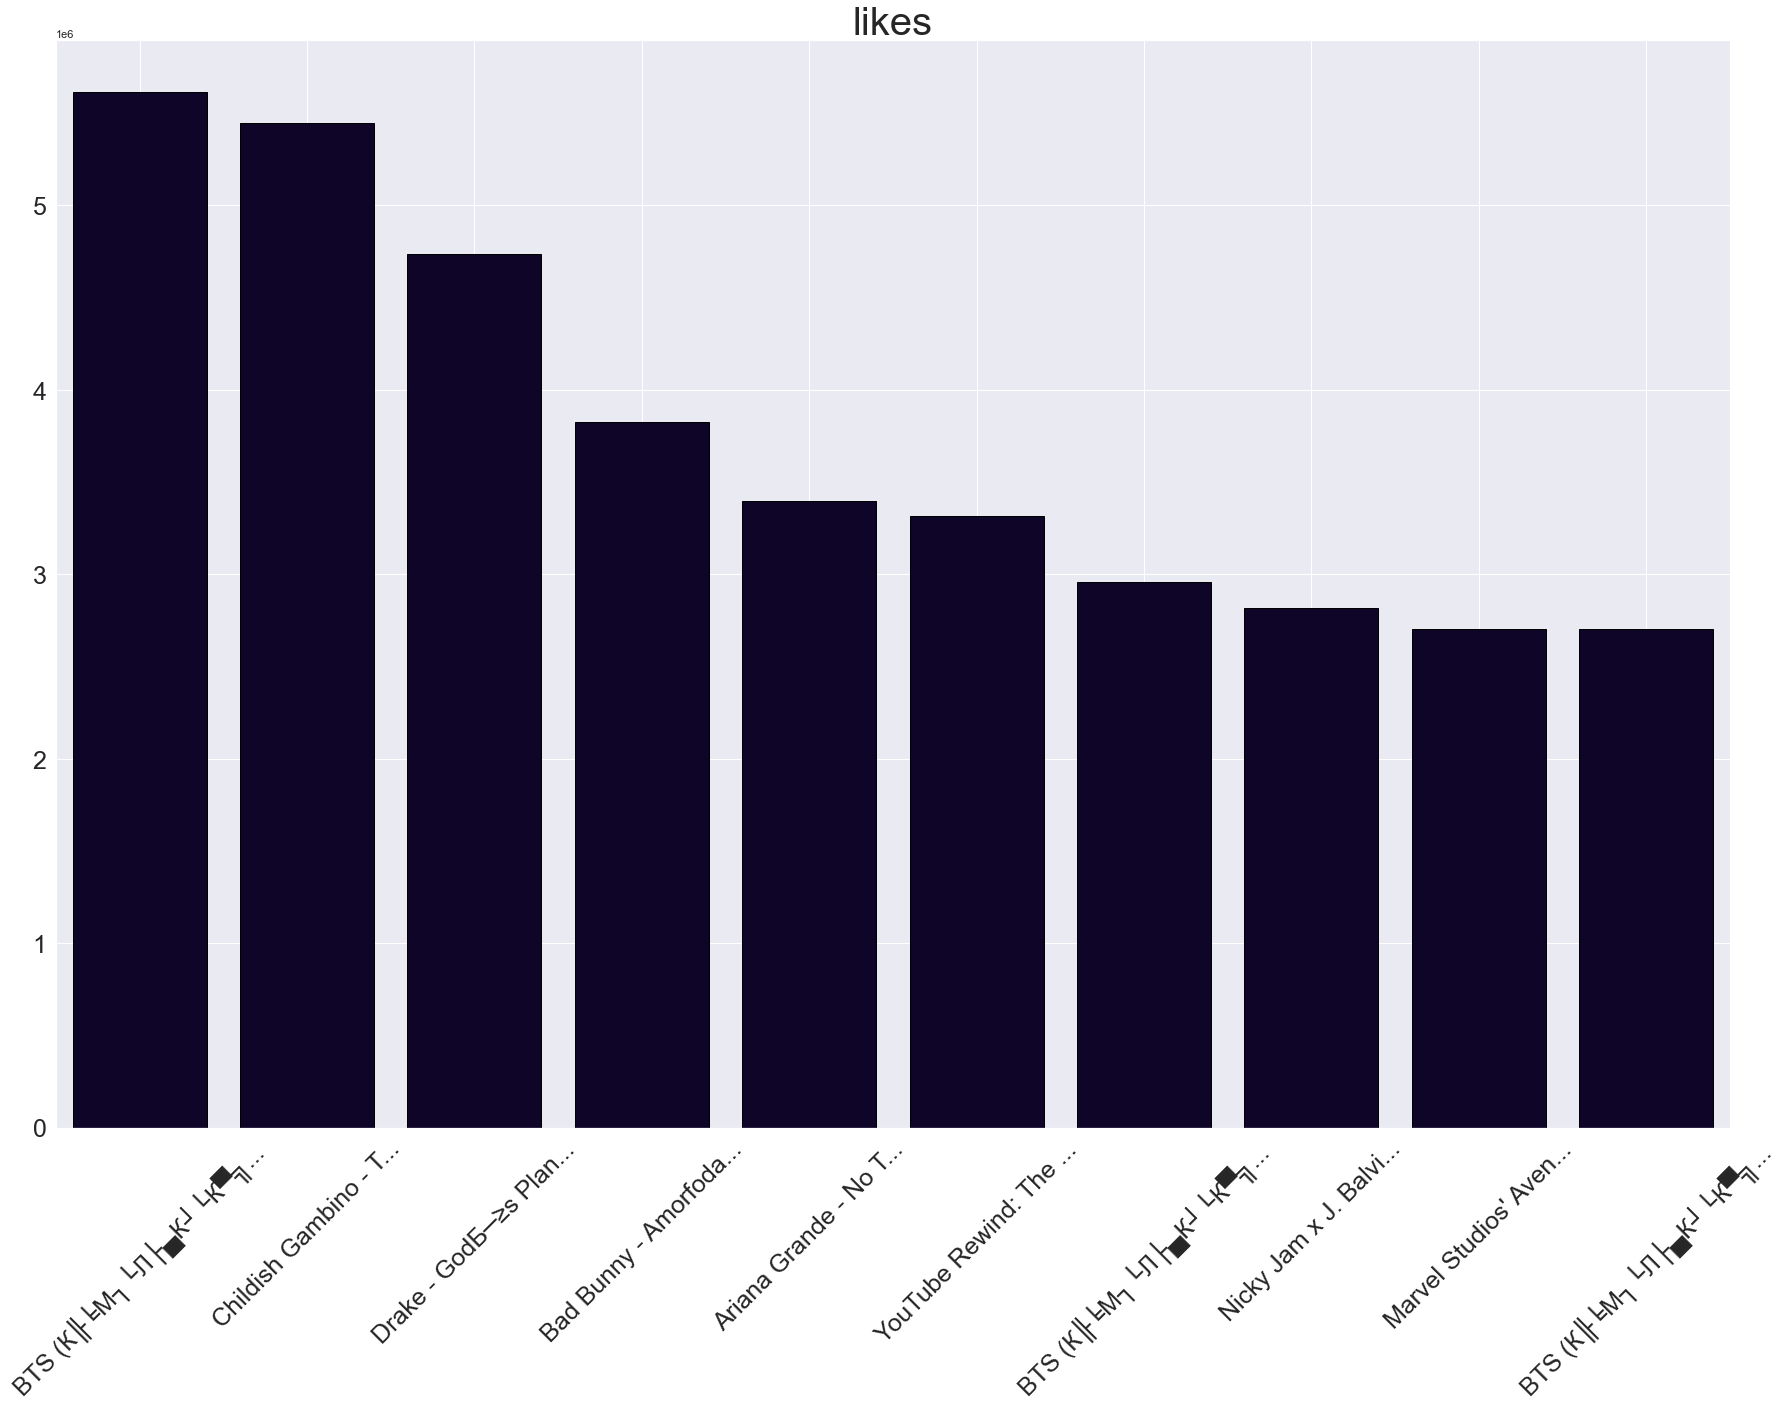

In [815]:
visualize_for_video(data_no_duplicates , 'likes')

<class 'matplotlib.axes._subplots.AxesSubplot'>


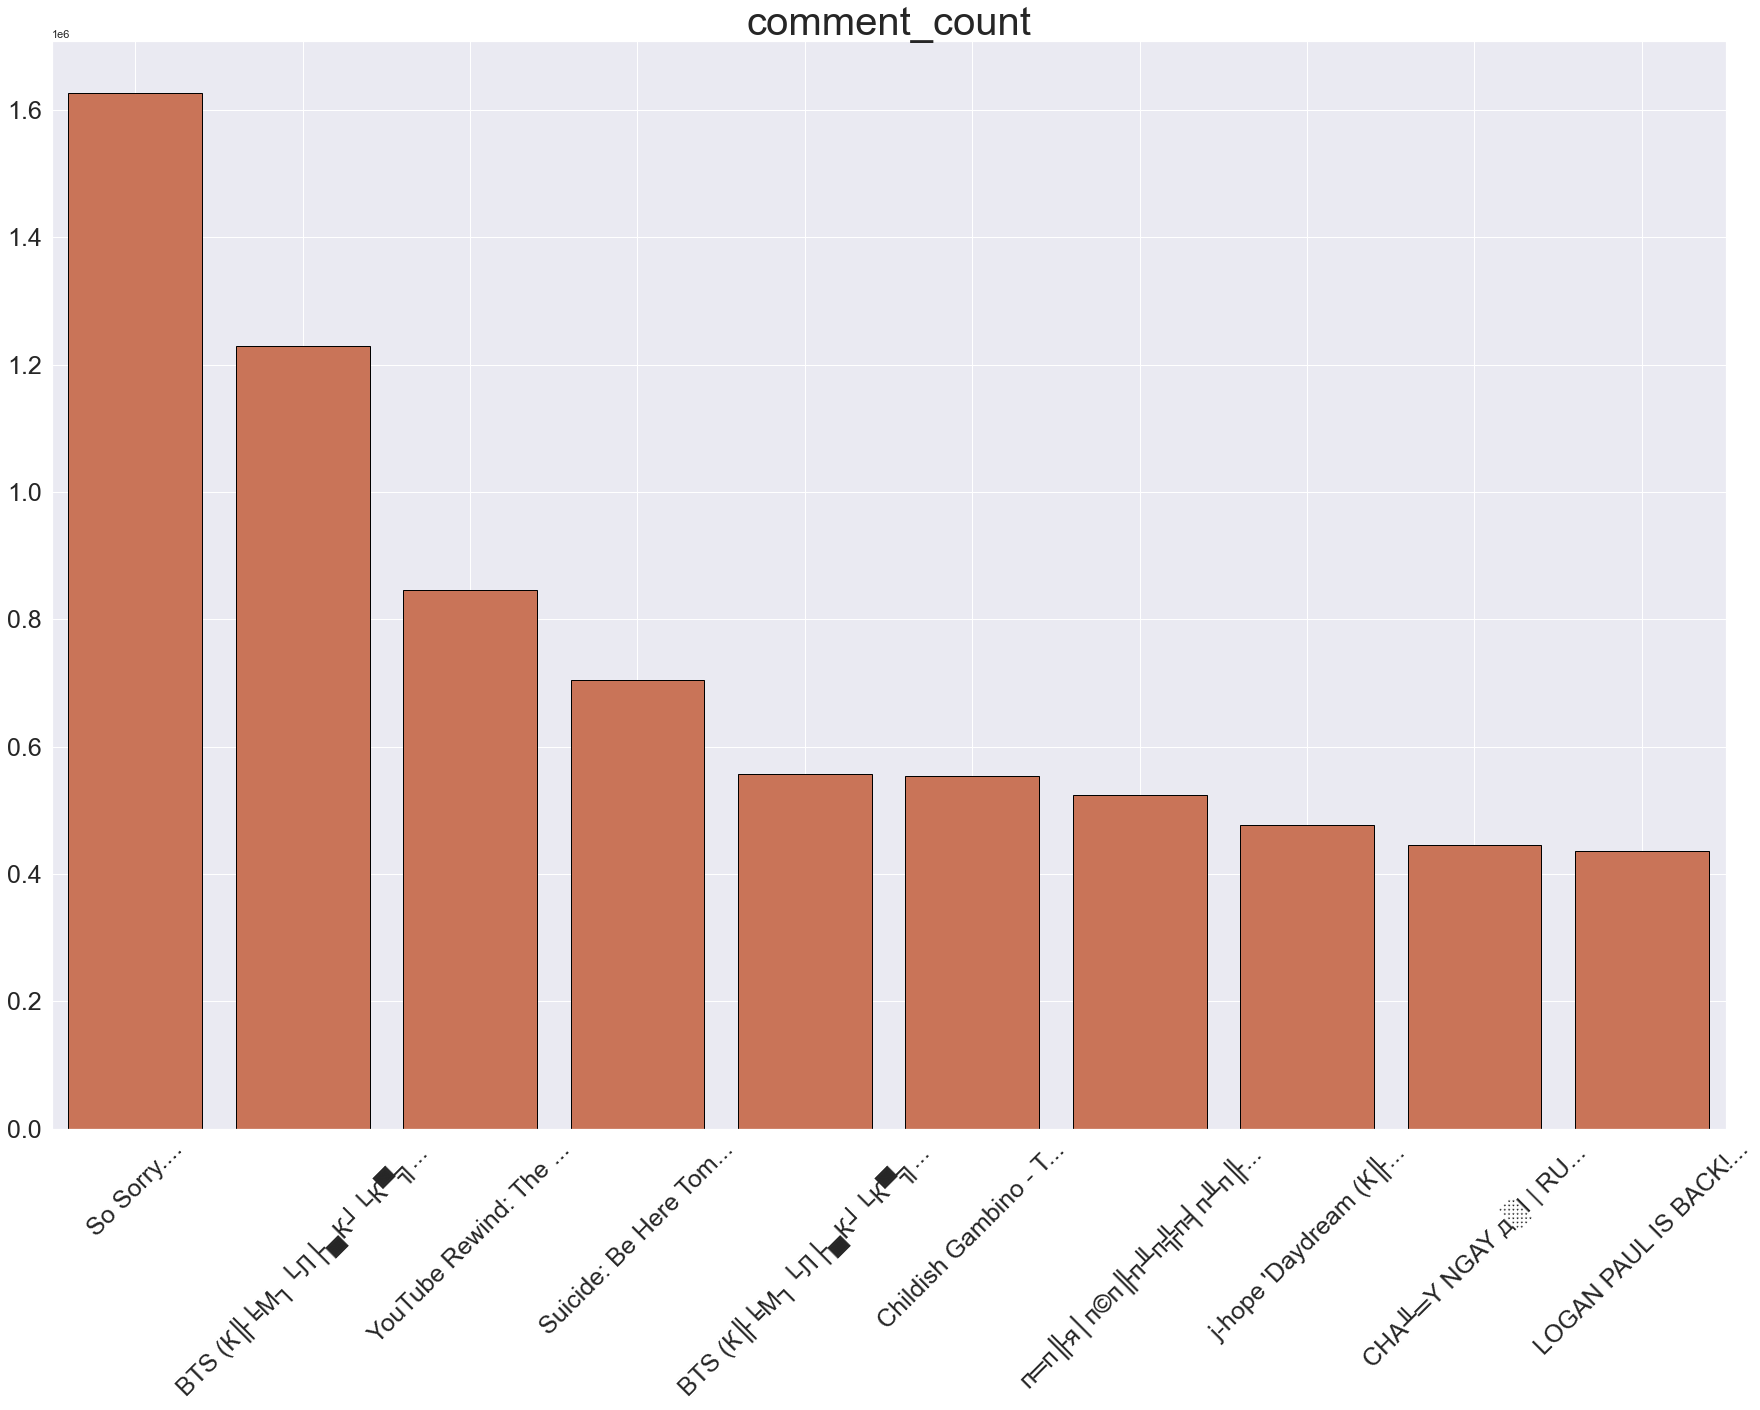

In [816]:
visualize_for_video(data_no_duplicates, 'comment_count')

<class 'matplotlib.axes._subplots.AxesSubplot'>


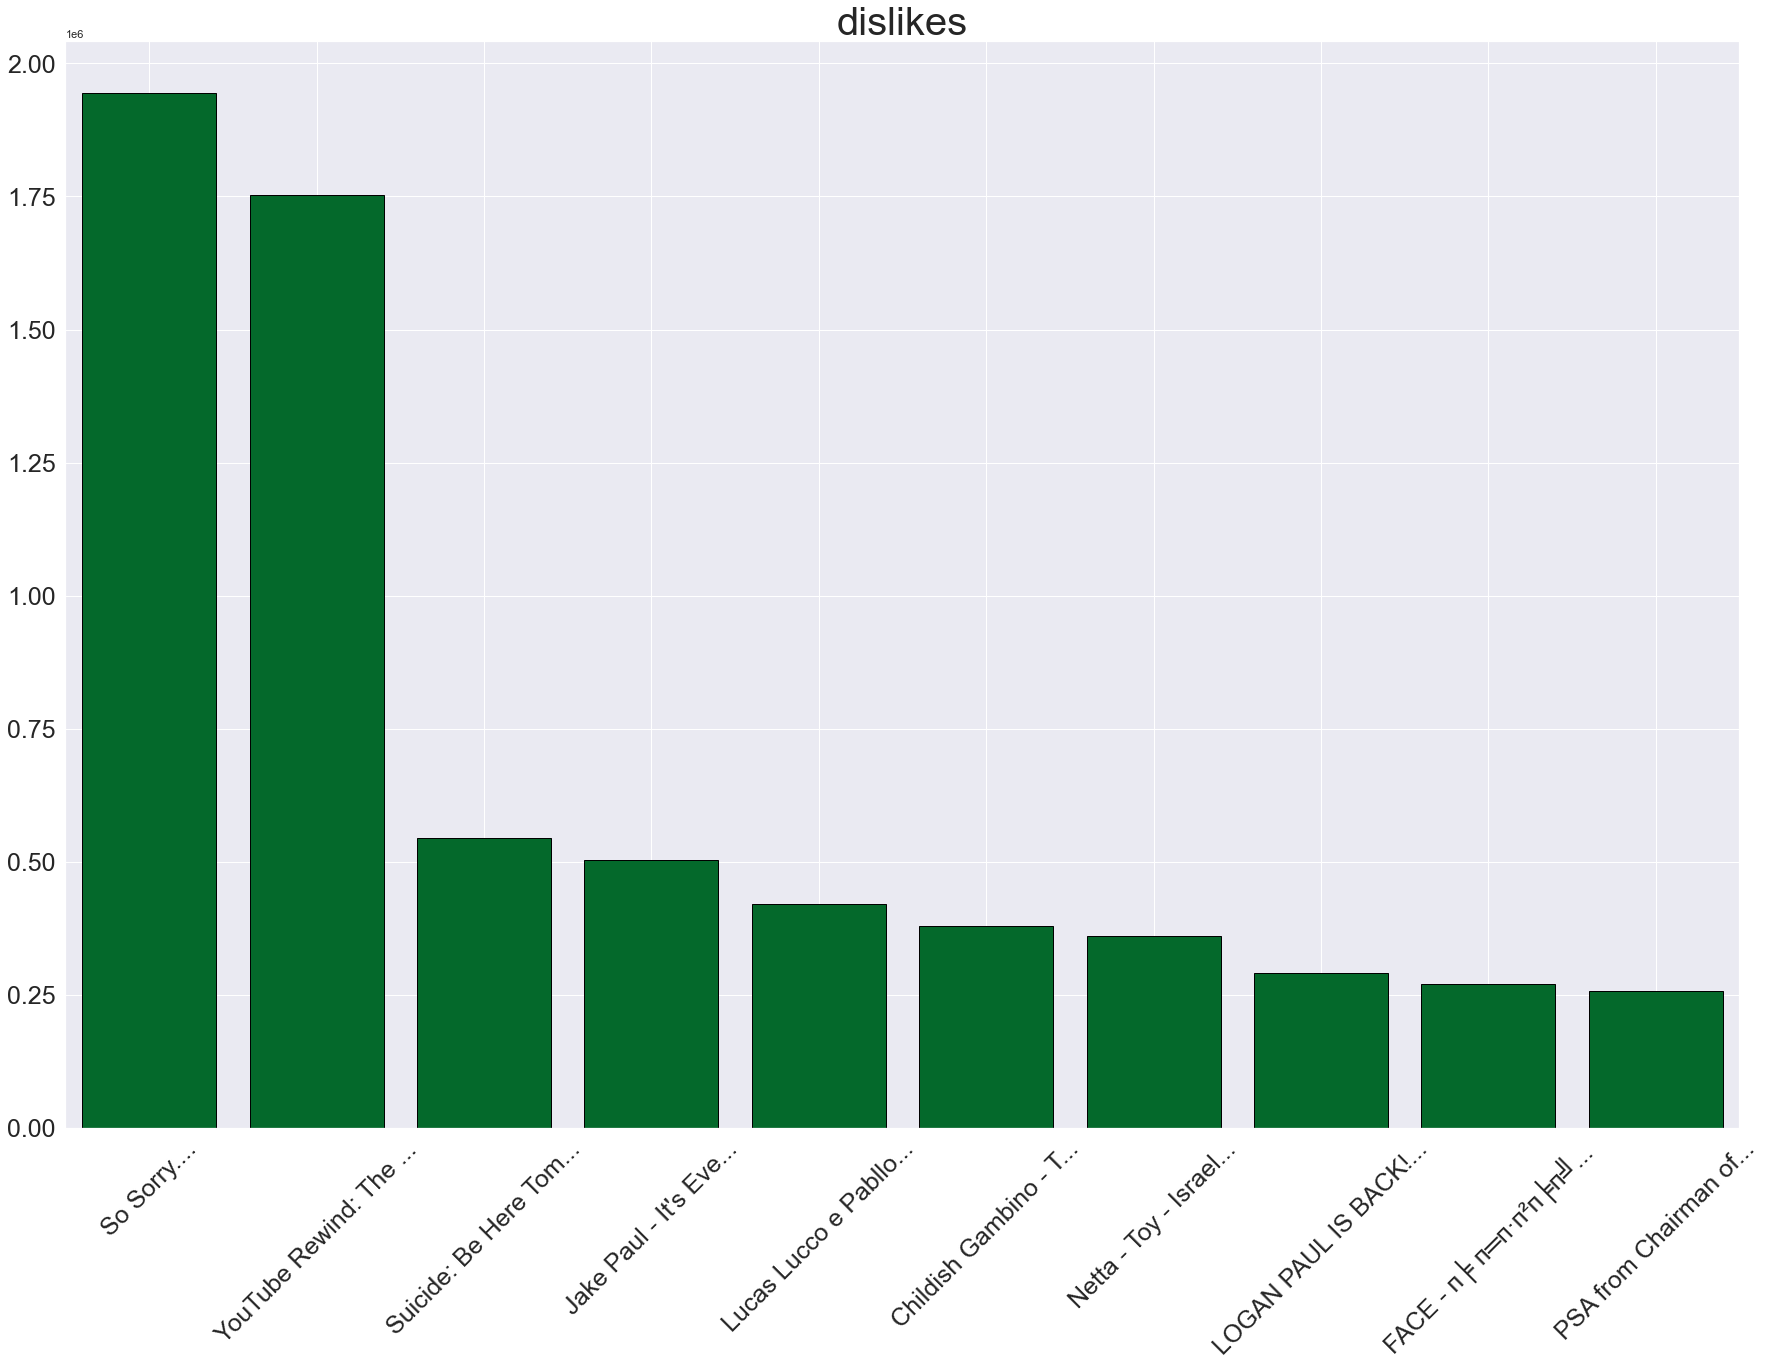

In [817]:
visualize_for_video(data_no_duplicates, 'dislikes')

##### Статистика самых популярных видео по странам

Проделаем необходимые преобразования

In [986]:
for i in [data_CA, data_DE, data_FR, data_GB, data_IN, data_JP, data_KR, data_MX, data_RU, data_US]:
    i.insert(0, 'rating', i['likes'] / ((i['dislikes'] + (i['likes']))))
    i['rating'] = i['rating'].fillna(0)
    i = i.sort_values(['rating', 'views'], ascending=False)
    i = i.drop_duplicates(subset = ['video_id', 'country'], keep = "last")
    i = i.drop(index = i[i['video_id'] == '#NAME?'].index, axis = 0)
    i = i.drop(index = i[i['video_id'] == '#VALUE!'].index, axis = 0)
    i = i.sort_values(by=['rating', 'views'], ascending=False)

<class 'matplotlib.axes._subplots.AxesSubplot'>


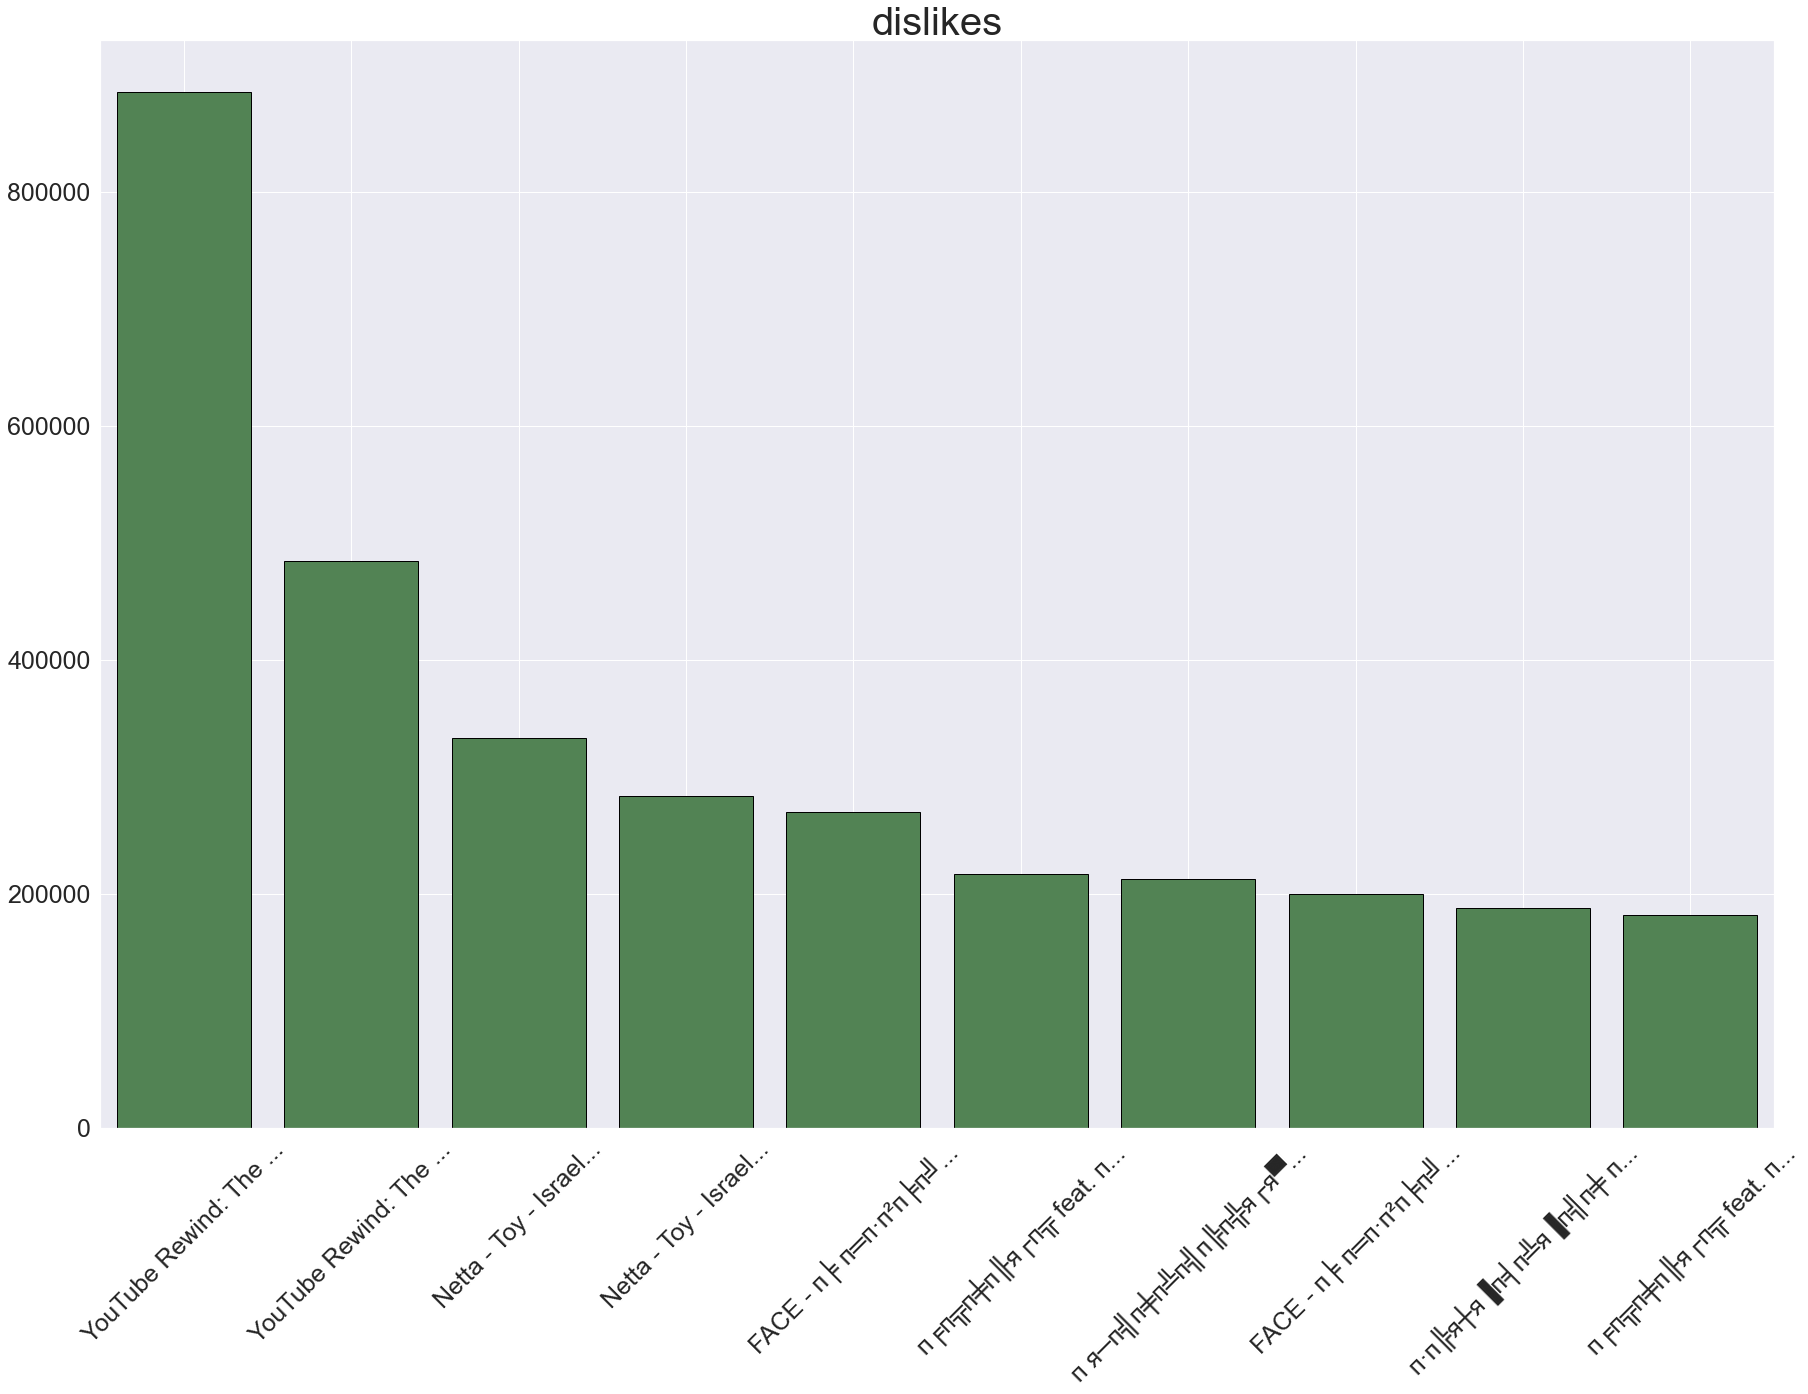

In [987]:
visualize_for_video(data_RU, 'dislikes')

<class 'matplotlib.axes._subplots.AxesSubplot'>


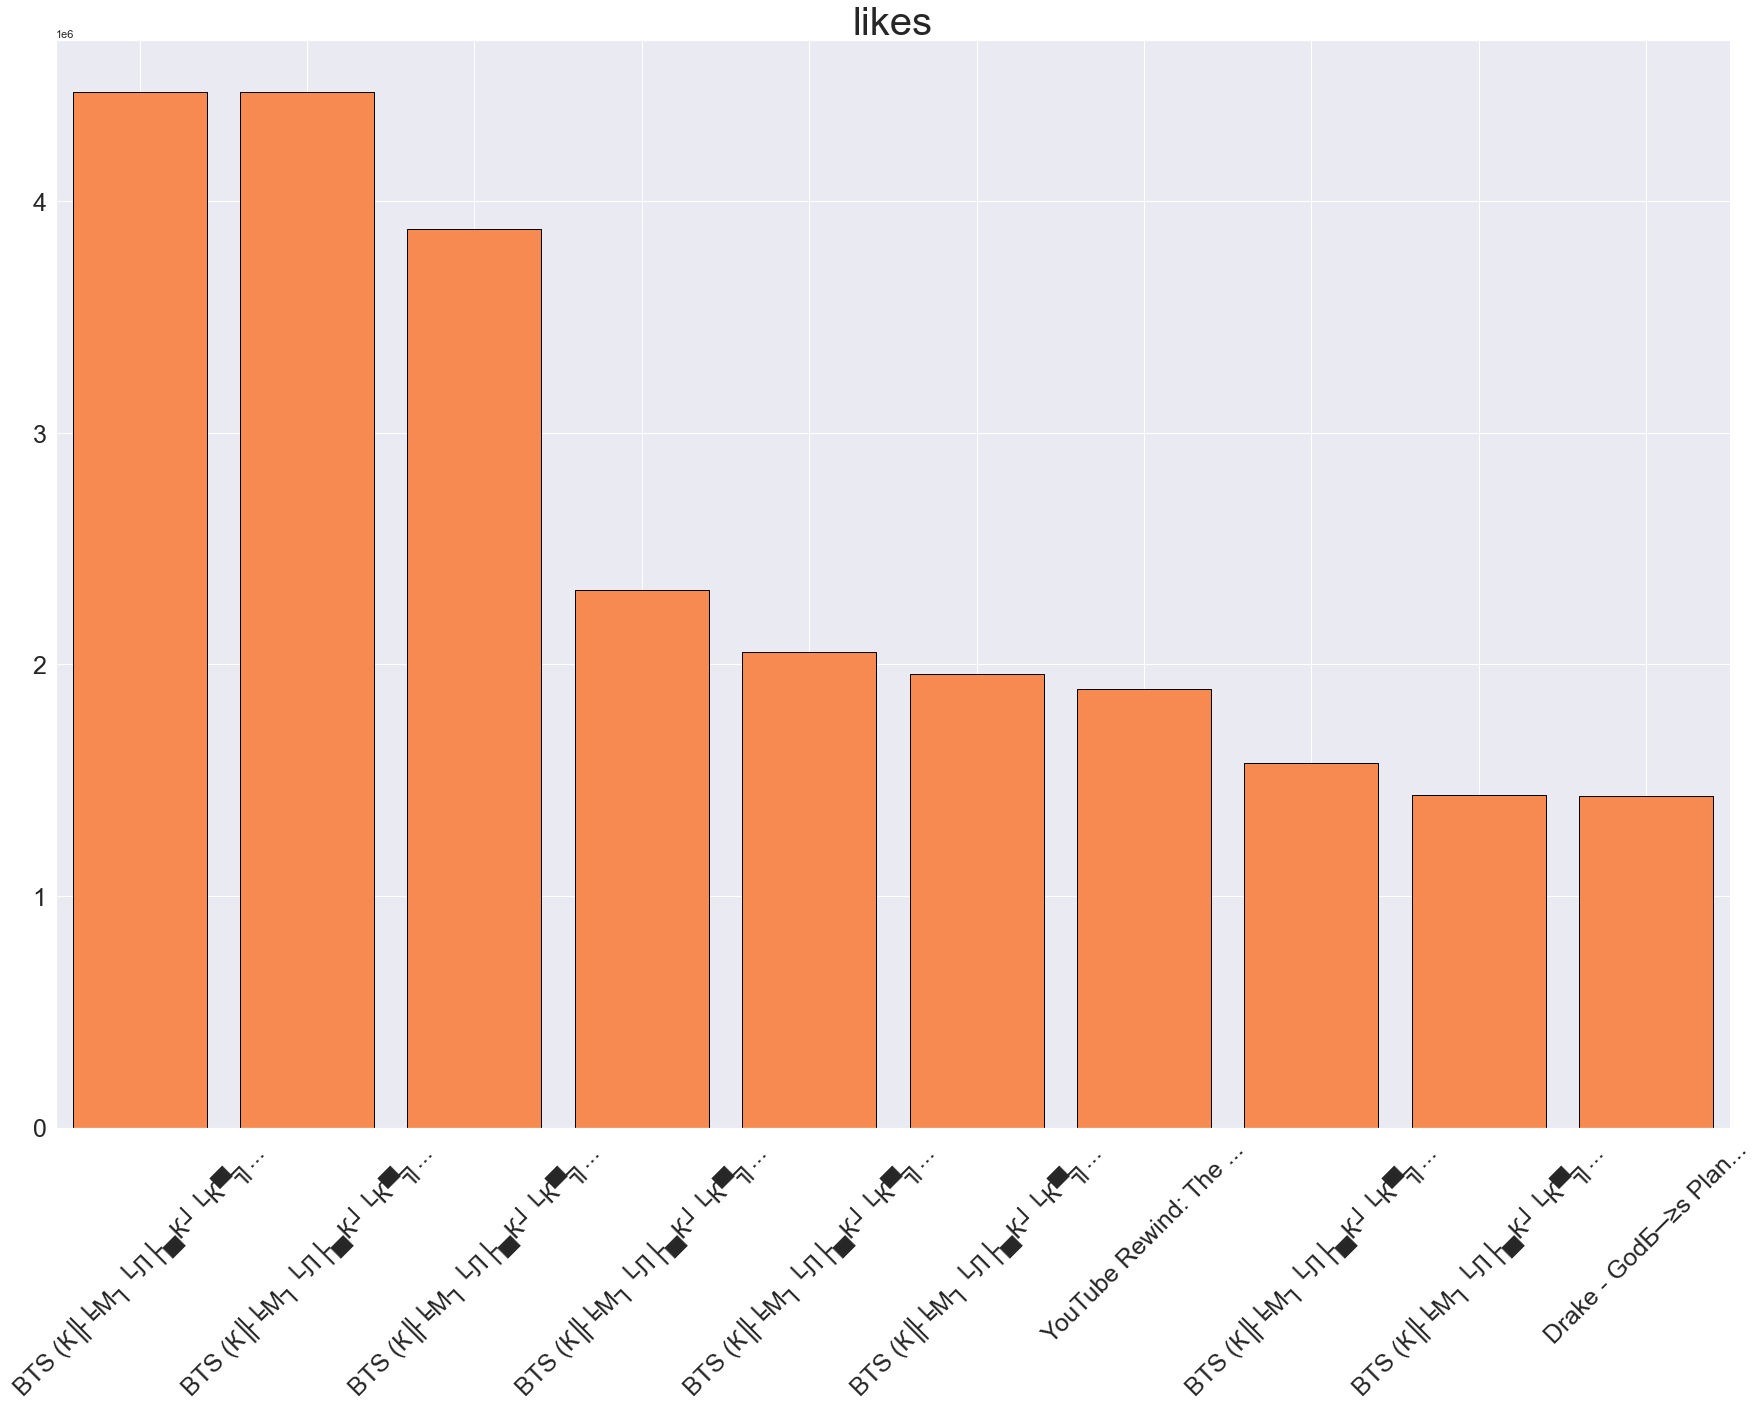

In [990]:
visualize_for_video(data_RU, 'likes')

<class 'matplotlib.axes._subplots.AxesSubplot'>


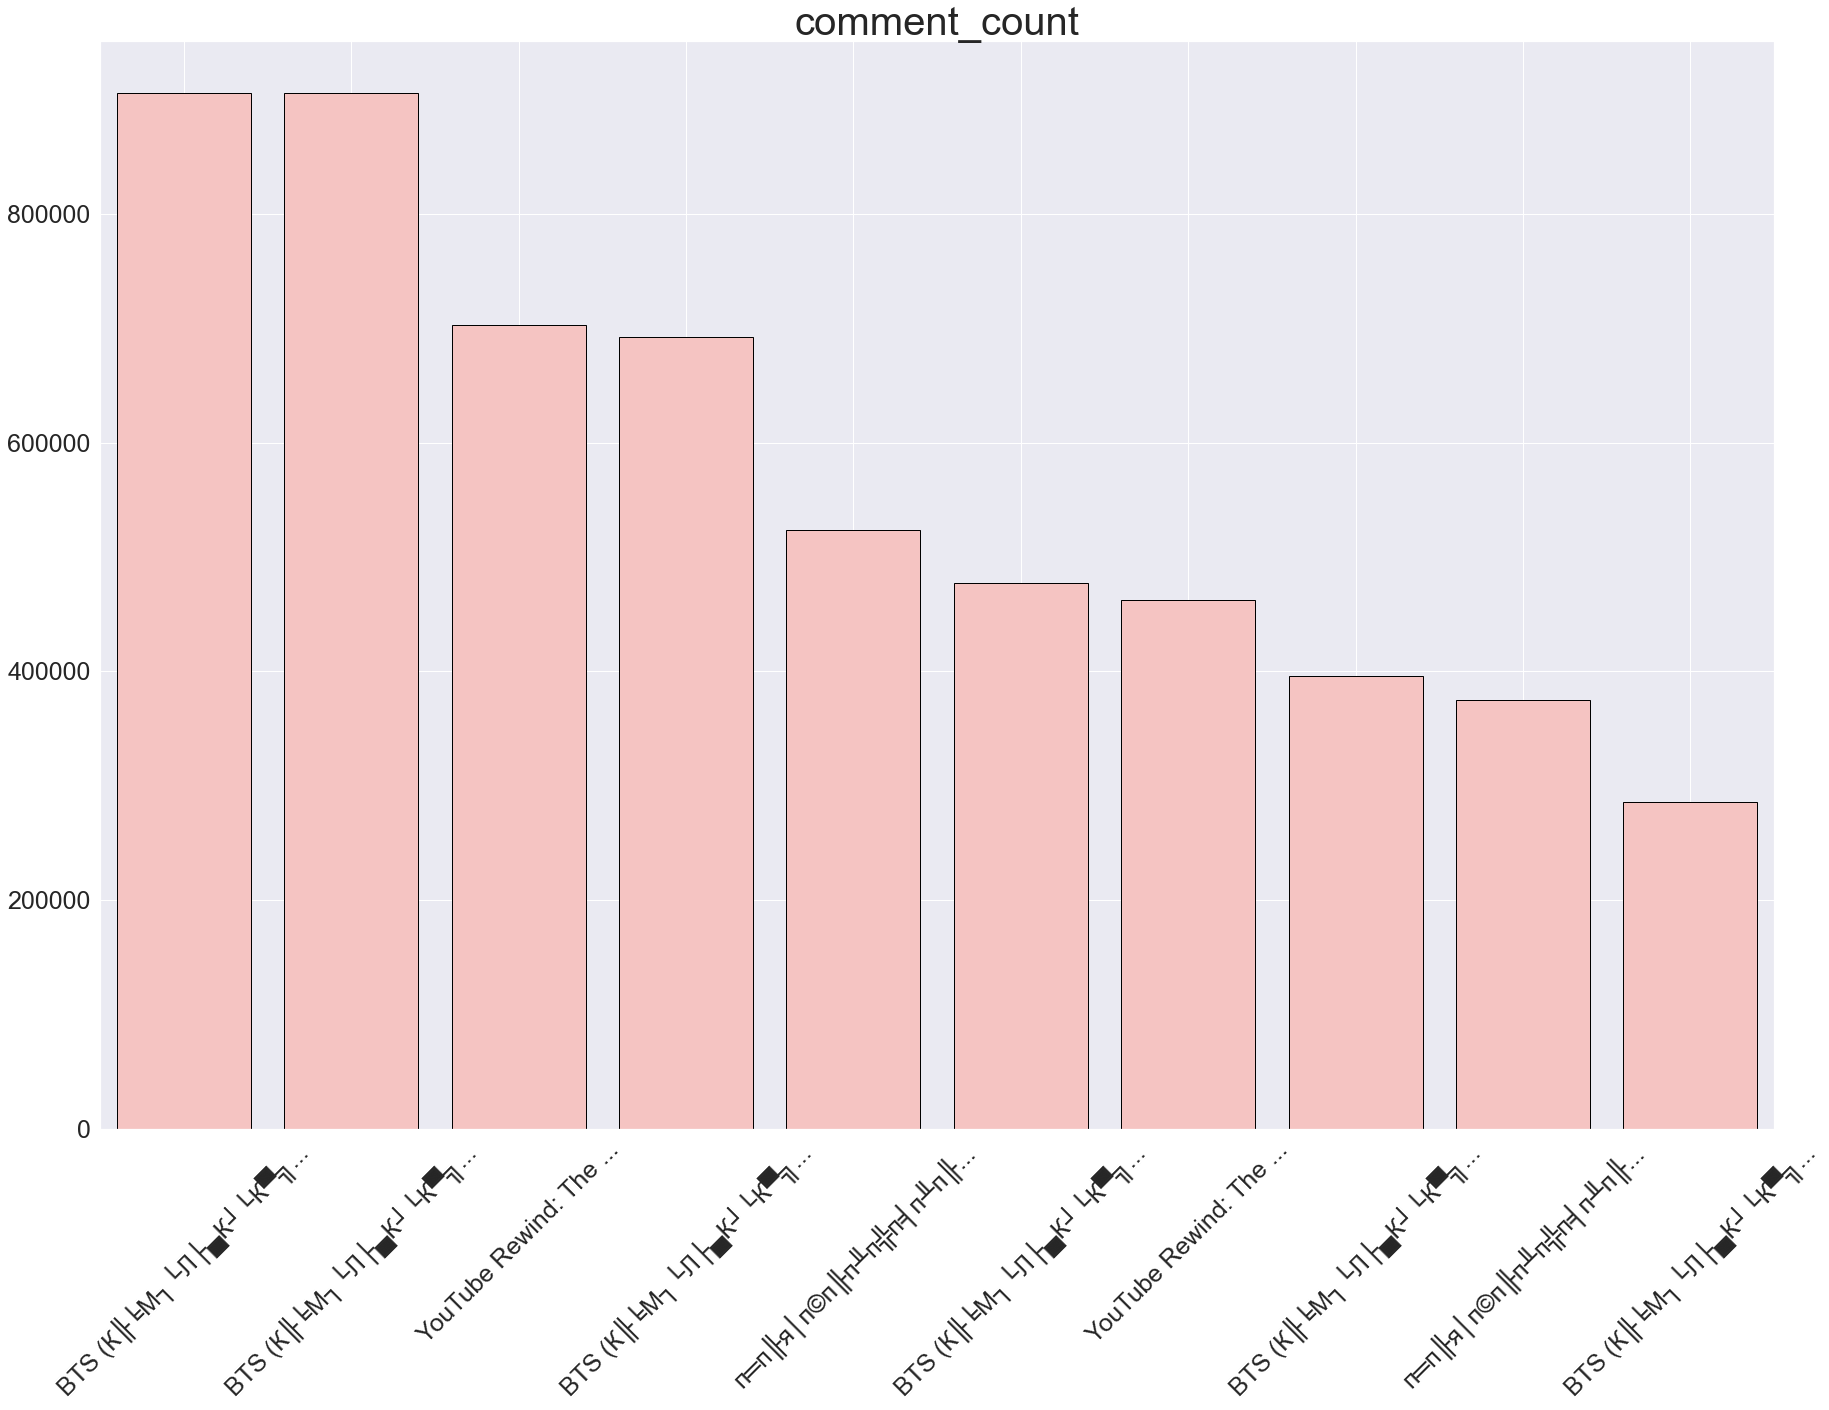

In [991]:
visualize_for_video(data_RU, 'comment_count')

<class 'matplotlib.axes._subplots.AxesSubplot'>


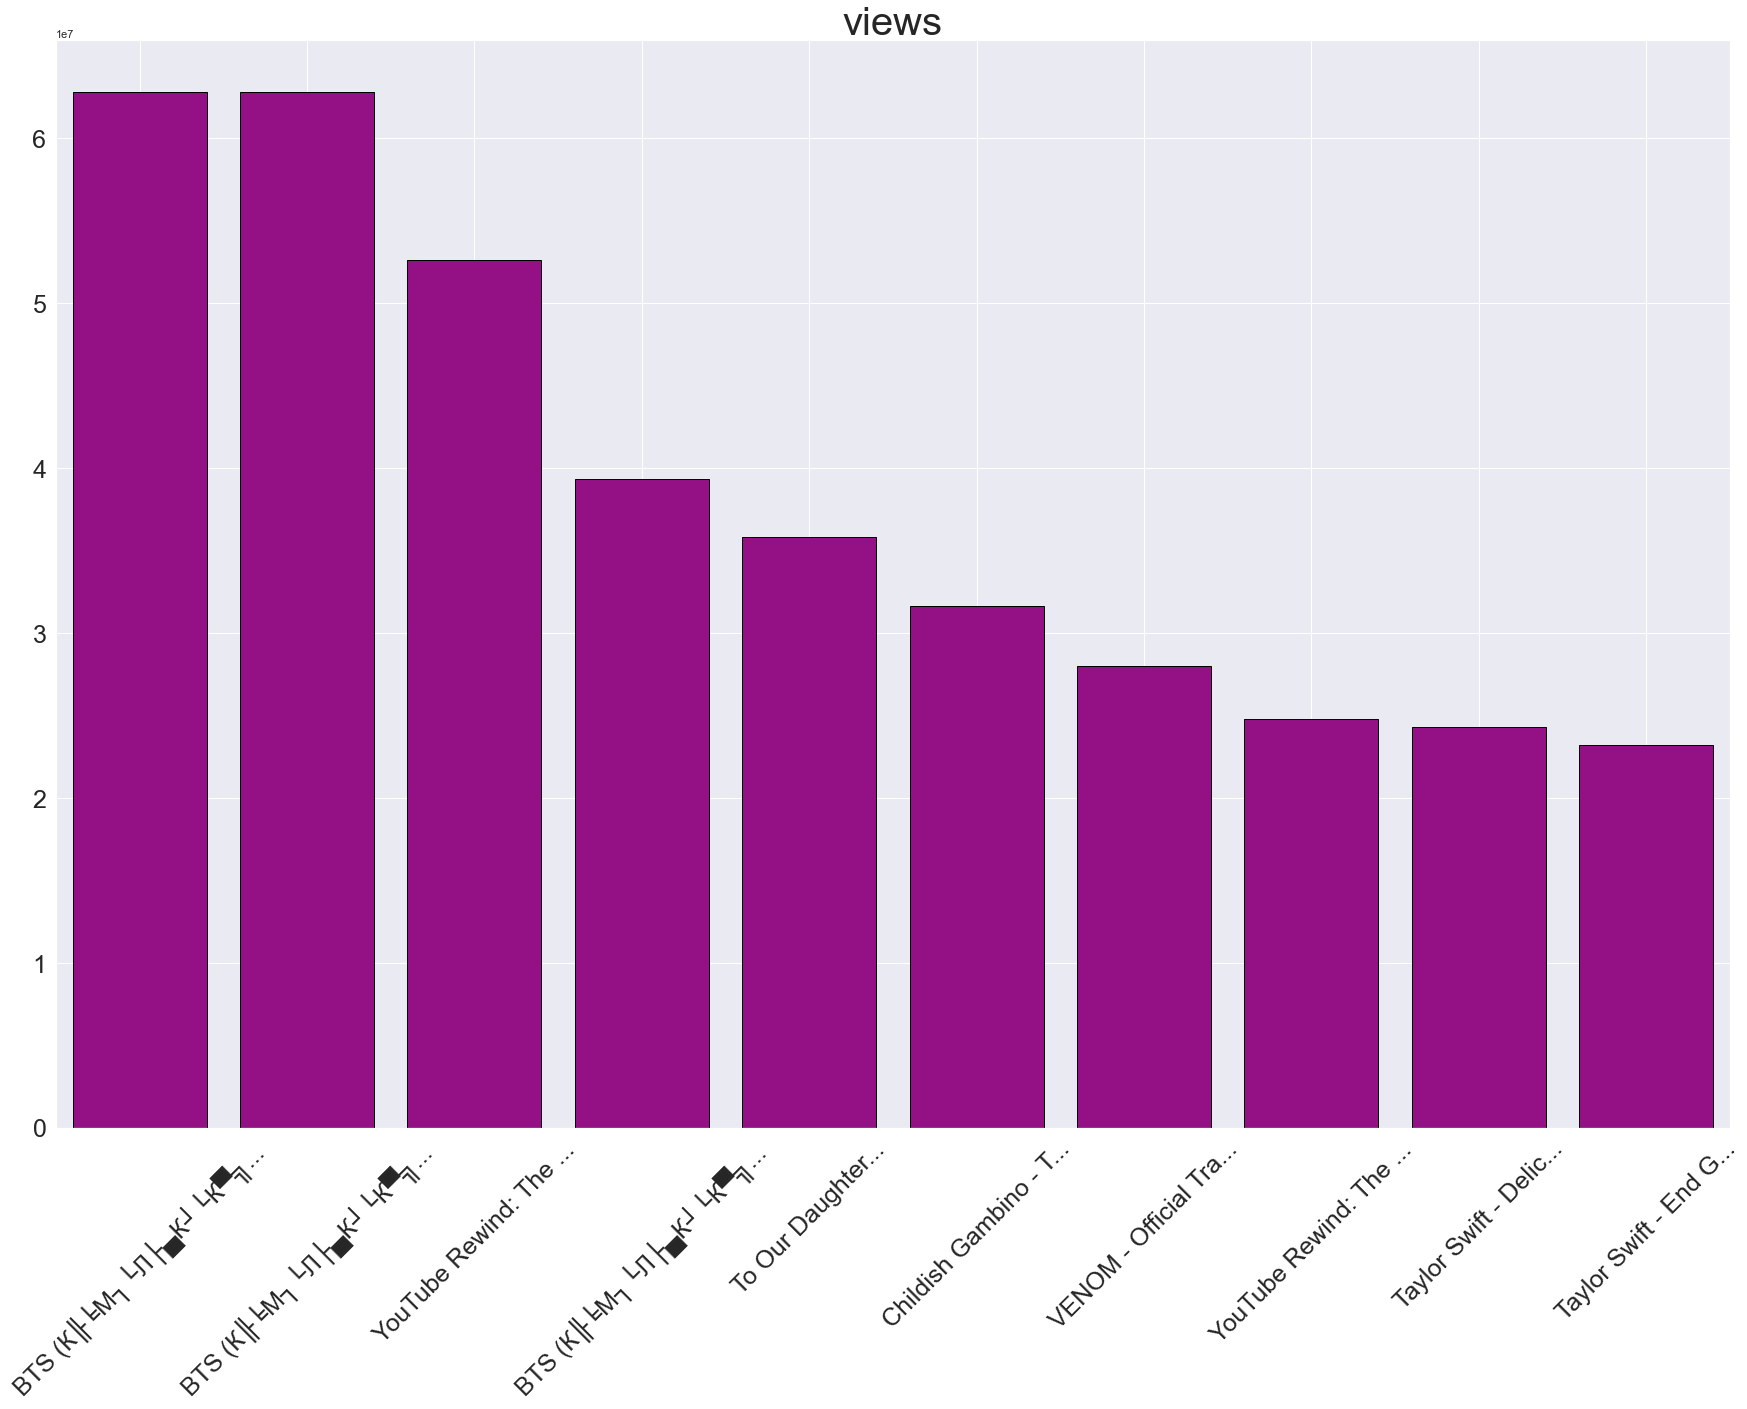

In [992]:
visualize_for_video(data_RU, 'views')

<class 'matplotlib.axes._subplots.AxesSubplot'>


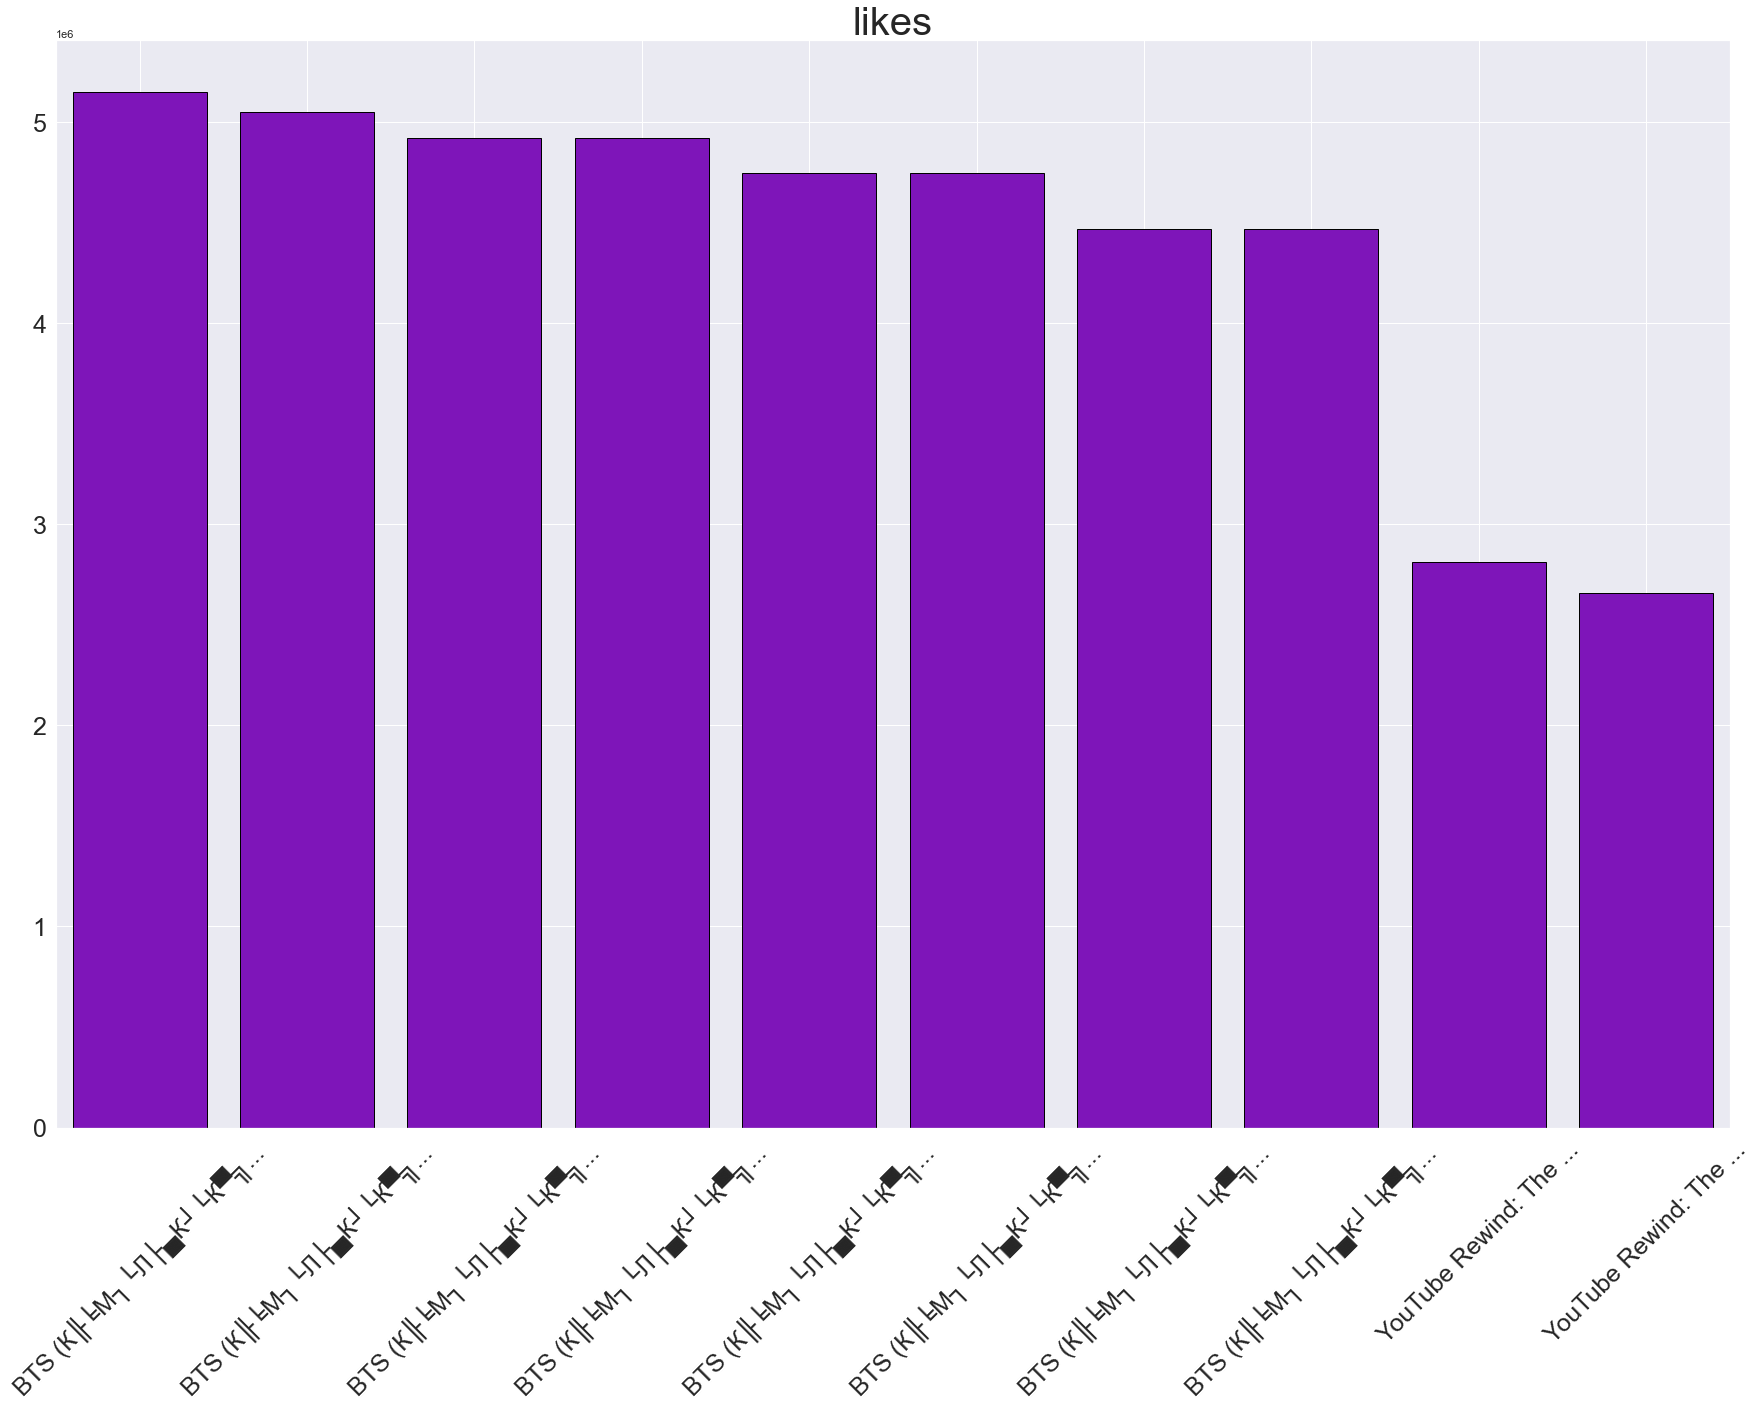

In [989]:
visualize_for_video(data_KR, 'likes')

##### Есть ли зависимость?

<AxesSubplot:>

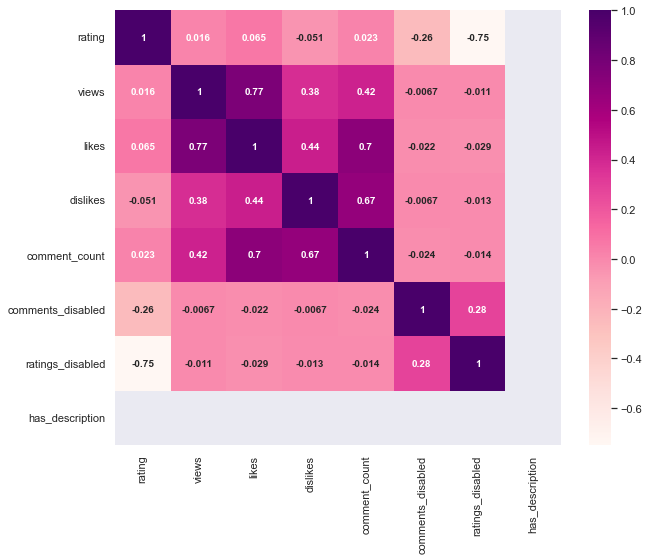

In [818]:
data_useful = data_no_duplicates.copy() 
data_useful.drop(['category_id', 'days_different', 'video_error_or_removed'], inplace=True, axis=1)
# def f(row):
#     return data_useful[row]['description'] != ''
# data_useful['has_description'] = data_useful.apply(f, axis=1)
# has_description не работает как надо
data_useful['has_description'] = data_useful['description'].astype(bool).astype(int)
corr =data_useful.corr()
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns,
            annot = True,
            cmap="RdPu",
            annot_kws={"weight":"bold"})

In [819]:
data_useful[data_useful['description'] == '']

,rating,video_id,trending_date,title,channel_title,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,genre,has_description


In [822]:
data[data['description'] == '']

,rating,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,days_different,tags,...,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,genre


Наблюдается зависимость между лайками и просмотрами; лайками, дизлайками и количеством комментариев.
Также ожидалось, что между закрытостью комментариев / скрытностью рейтинга и количеством дизлайков будет сильная взаимосвязь, но вопреки ожиданиям, случайные величины независимы

#### Статистика по популярности жанров

Entertainment            53472
People & Blogs           26531
Music                    20824
News & Politics          18223
Comedy                   12970
Sports                   11543
Film & Animation         10335
Howto & Style             9215
Gaming                    5826
Education                 3933
Science & Technology      3843
Autos & Vehicles          2436
Pets & Animals            2404
Nonprofits & Activism     1422
Travel & Events            853
Shows                      452
Trailers                     4
Movies                       1
Name: genre, dtype: int64


[Text(0, 0, 'Entertainment'),
 Text(1, 0, 'People & Blogs'),
 Text(2, 0, 'Music'),
 Text(3, 0, 'News & Politics'),
 Text(4, 0, 'Comedy'),
 Text(5, 0, 'Sports'),
 Text(6, 0, 'Film & Animation'),
 Text(7, 0, 'Howto & Style'),
 Text(8, 0, 'Gaming'),
 Text(9, 0, 'Education'),
 Text(10, 0, 'Science & Technology'),
 Text(11, 0, 'Autos & Vehicles'),
 Text(12, 0, 'Pets & Animals'),
 Text(13, 0, 'Nonprofits & Activism'),
 Text(14, 0, 'Travel & Events'),
 Text(15, 0, 'Shows'),
 Text(16, 0, 'Trailers'),
 Text(17, 0, 'Movies')]

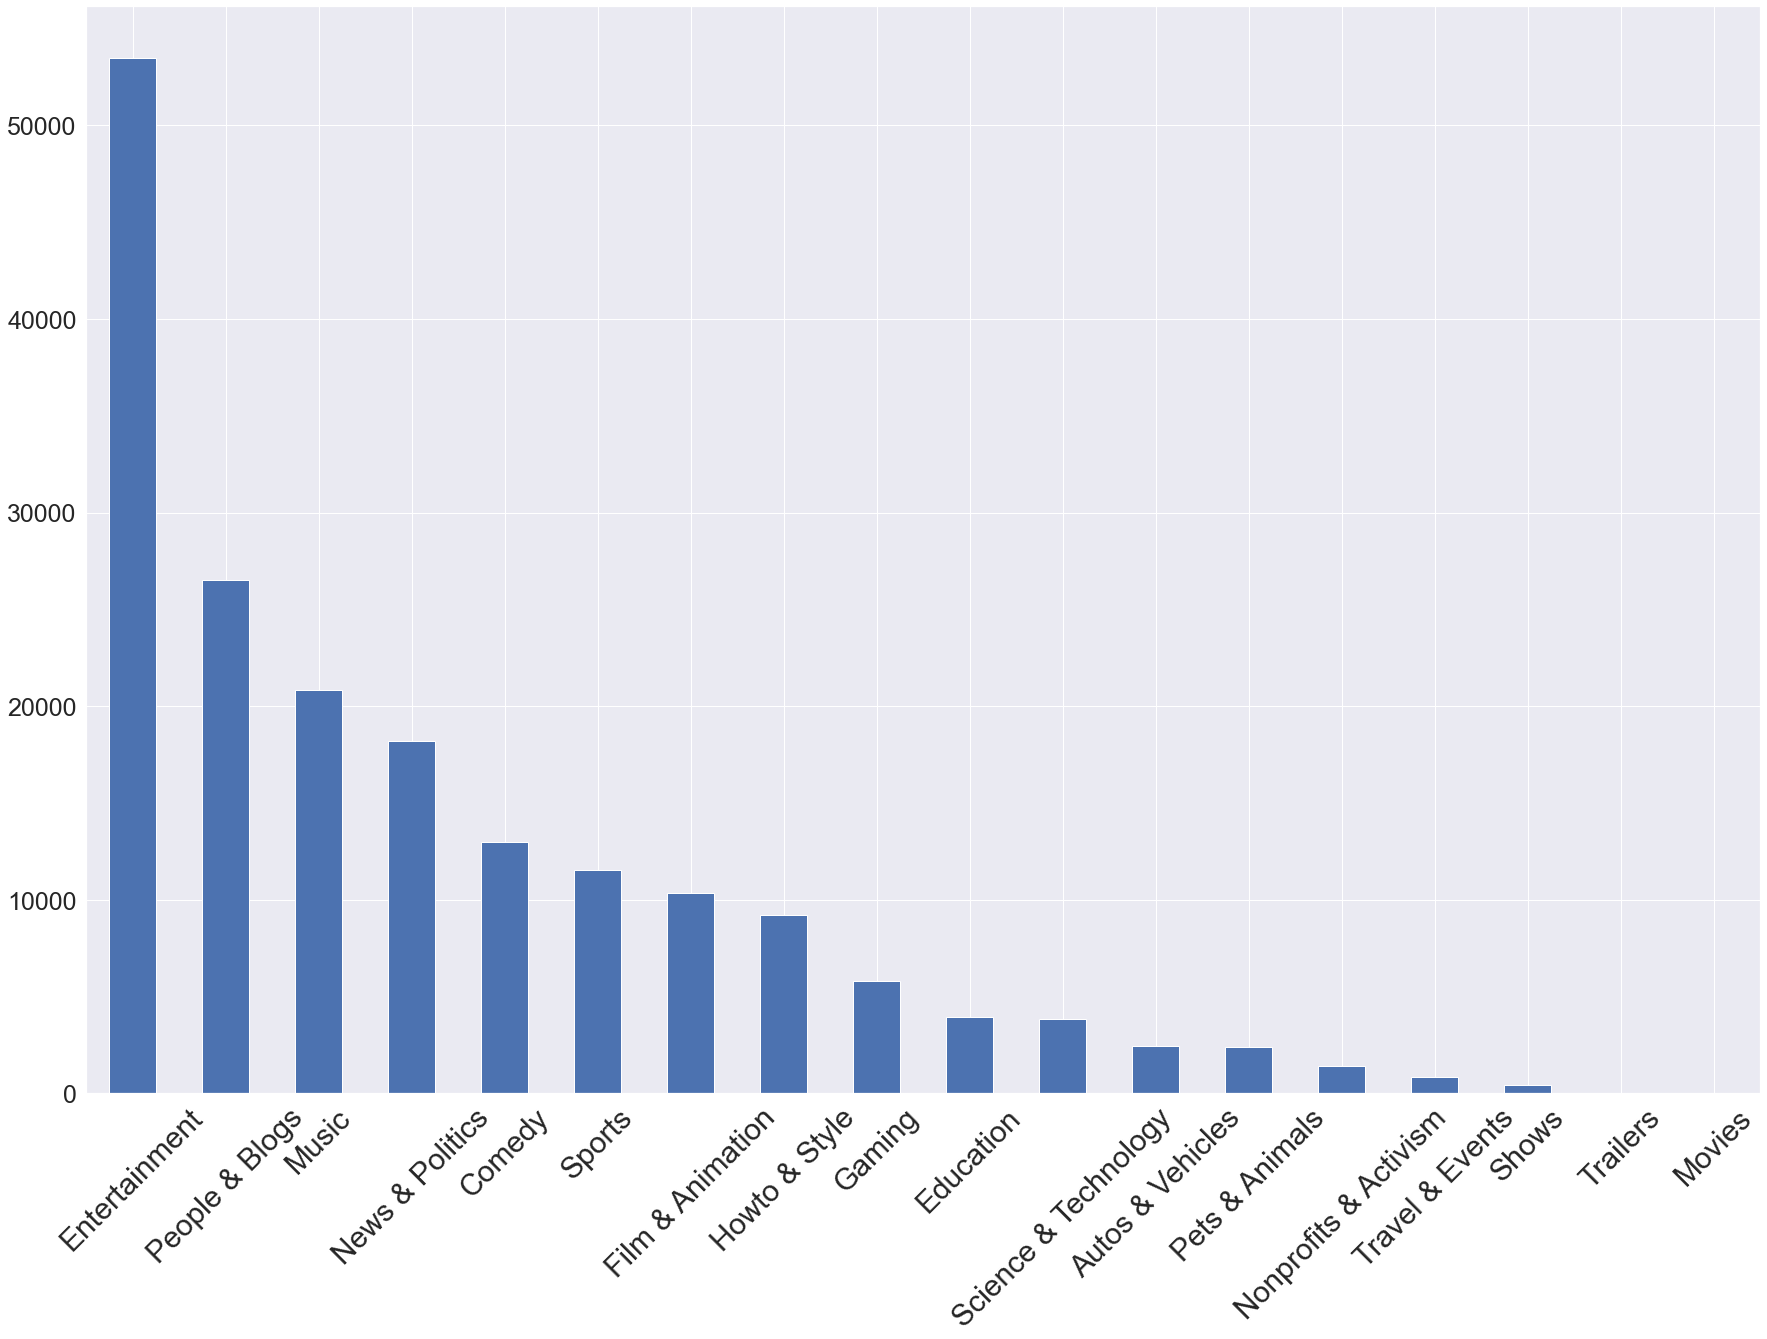

In [995]:
category_count = data_no_duplicates['genre'].value_counts()
print(category_count)
ax = category_count.plot.bar(figsize=(30,20),fontsize=25)
ax.set_xticklabels(labels=category_count.index, rotation=45, fontsize=30)


In [998]:
 data_no_duplicates

,rating,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,days_different,tags,...,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,genre
20314,0.857143,kz9Q2oALmWE,2018-02-25,п═п╬я│я│п╦я▐ - п⌠п╣я─п╪п╟п╫п╦я▐. п║я┤п╣я┌ 4:3....,Alexander Redking,17,2018-02-25,06:57:15,0,"п╫п╬п╡п╬я│я┌п╦|""я│п╬п╠я▀я┌п╦я▐""|""я│п©п╬я─я┌""|""...",...,12,2,1,https://i.ytimg.com/vi/kz9Q2oALmWE/default.jpg,False,False,False,п≤я│я┌п╬я┤п╫п╦п╨: https://twitter.com/sport_fm...,RU,Entertainment
2561,0.842105,AH9CPLoIWu4,2017-11-26,RESUMEN CELAYA VS ALEBRIJES ASCENSO MX 2017,Ascenso MX,17,2017-11-26,06:05:11,0,"RESUMEN CELAYA VS ALEBRIJES ASCENSO MX 2017|""R...",...,16,3,7,https://i.ytimg.com/vi/AH9CPLoIWu4/default.jpg,False,False,False,RESUMEN CELAYA VS ALEBRIJES SEMIFINAL VUELTA A...,MX,News & Politics
20345,0.833333,8_xuskv0SVw,2018-02-25,п═п·п║п║п≤п╞ - п⌠п∙п═п°п░п²п≤п╞ п⌠п·п⌡п╚ п≤ п⌡...,Sport Life,22,2018-02-25,06:58:40,0,"п·п╩п╦п╪п©п╦п╟п╢п╟|""2018""|""п╔п╬п╨п╨п╣п╧""|""п═п╬...",...,15,3,5,https://i.ytimg.com/vi/8_xuskv0SVw/default.jpg,False,False,False,п·п⌡п≤п°п÷п≤п░п■п░ 2018 п═п·п║п║п≤п╞ п⌠п∙п═п°п...,RU,Comedy
19764,1.000000,p3YzdrKZzAw,2018-02-22,п░п╫п╦я│п╦п╪п╬п╡ п╥п╟п╠п╦п╩ я│ п©п╟я│п╟ п п╣п╧...,NHL.COM/RU,17,2018-02-22,05:23:46,0,"п░я─я┌п╣п╪ п░п╫п╦я│п╦п╪п╬п╡|""п²п╔п⌡""|""п╔п╬п╨п╨...",...,15,0,1,https://i.ytimg.com/vi/p3YzdrKZzAw/default.jpg,False,False,False,п░я─я┌п╣п╪ п░п╫п╦я│п╦п╪п╬п╡ я│ п╠п╩п╦п╥п╨п╬пЁп...,RU,People & Blogs
19749,0.818182,yGmxdqeAzVo,2018-02-22,п²п╬п╡п╬я│я┌п╦ п╒п▓#п╕ 22.02.2018,C п≤я─п╦п╫п╨п╬п╧ HD_TV,25,2018-02-22,05:05:34,0,[none],...,9,2,2,https://i.ytimg.com/vi/yGmxdqeAzVo/default.jpg,False,False,False,,RU,Film & Animation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38401,0.934781,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06,04:00:07,36,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",...,5444541,379862,553371,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,Б─°This is AmericaБ─² by Childish Gambino http...,GB,News & Politics
21162,0.914574,wfWkmURBNv8,2018-03-01,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,10,2018-01-30,15:00:05,30,"Ozuna|""Reggaeton""|""Odisea""|""Odisea The Album""|...",...,1618180,151147,67506,https://i.ytimg.com/vi/wfWkmURBNv8/default.jpg,False,False,False,DESCARGA Odisea Aqui: http://apple.co/2vX00sT\...,GB,Music
25545,0.946643,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,10,2018-02-15,00:00:03,36,"Bad|""Bunny""|""Bad Bunny""|""Video Oficial""|""Music...",...,3823879,215530,225216,https://i.ytimg.com/vi/kLpH1nSLJSs/default.jpg,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,GB,Comedy
34460,0.939404,9jI-z9QN6g8,2018-05-18,"Te Bote Remix - Casper, Nio Garcц╜a, Darell, N...",Flow La Movie,10,2018-04-11,22:00:00,37,"Te Bote|""Te Bote Remix""|""Flow La Movie""|""Ozuna...",...,2581961,166549,113564,https://i.ytimg.com/vi/9jI-z9QN6g8/default.jpg,False,False,False,Flow La Movie Presenta - Te Botц╘ Remix - Casp...,GB,Entertainment


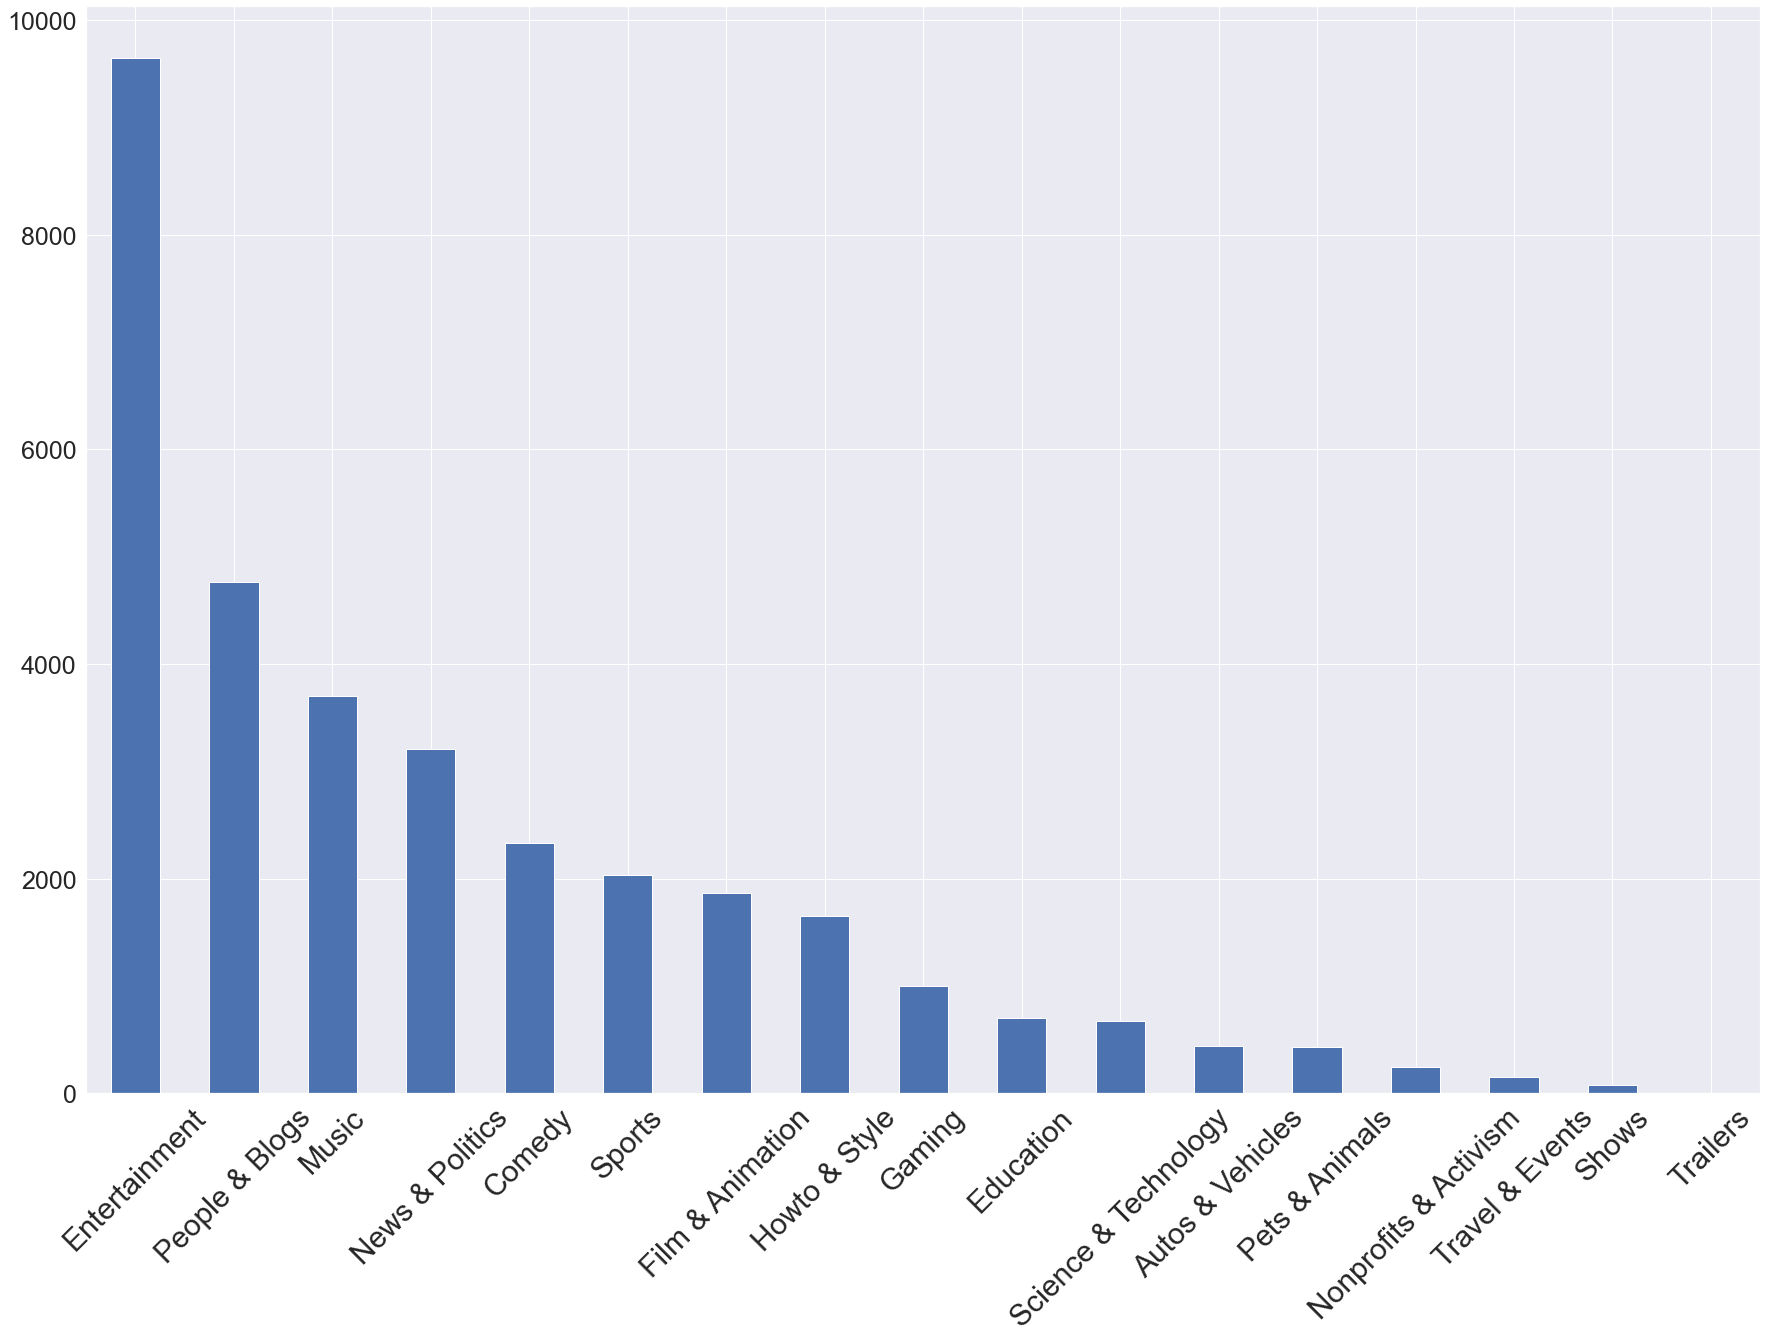

In [1005]:
def visualize_genre_stats(country):
    data_country = data_no_duplicates[data_no_duplicates['country'] == country]
    category_count = data_country['genre'].value_counts()
    ax = category_count.plot.bar(figsize=(30,20),fontsize=25)
    ax.set_xticklabels(labels=category_count.index, rotation=45, fontsize=30)
    
    
visualize_genre_stats('RU')

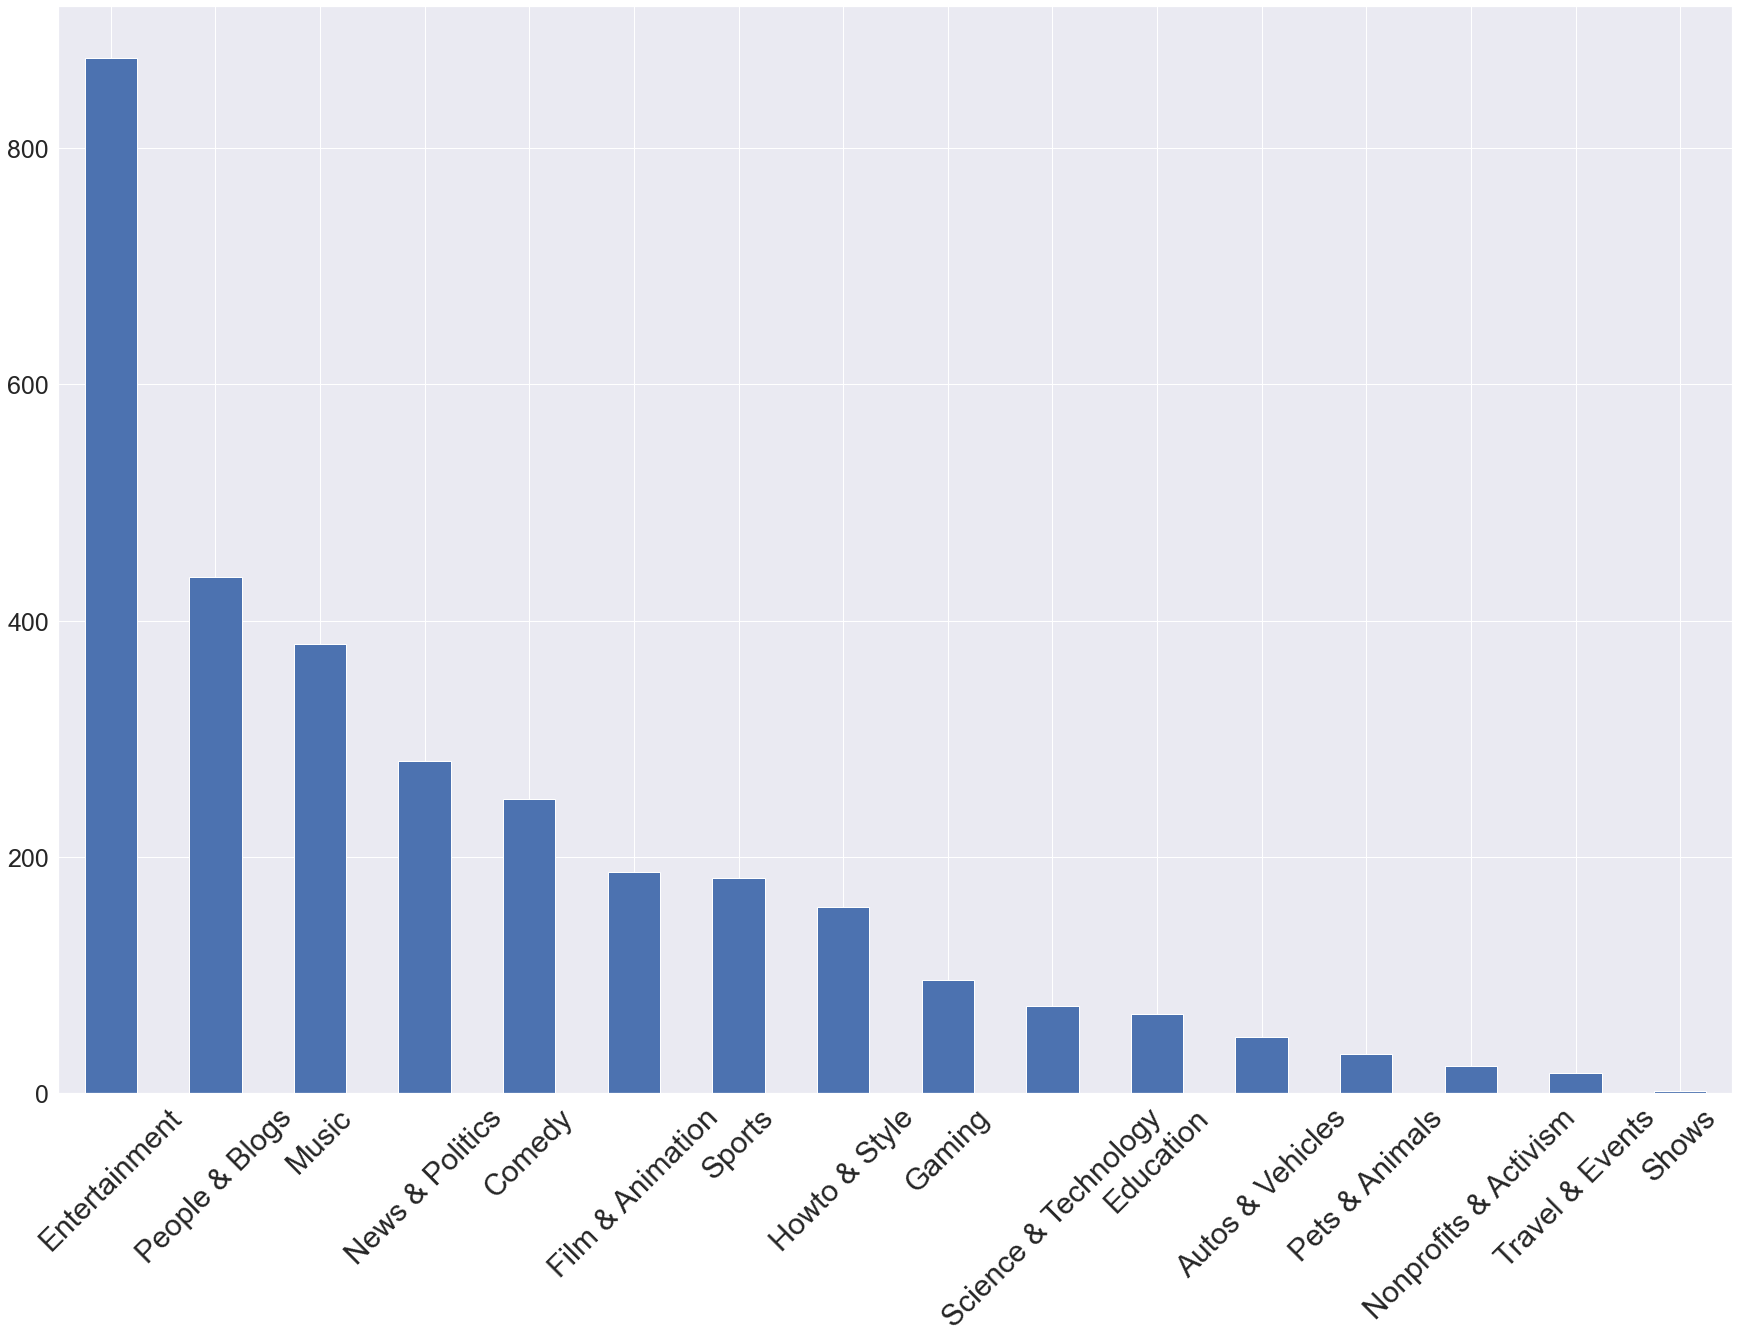

In [1006]:
visualize_genre_stats('GB')  

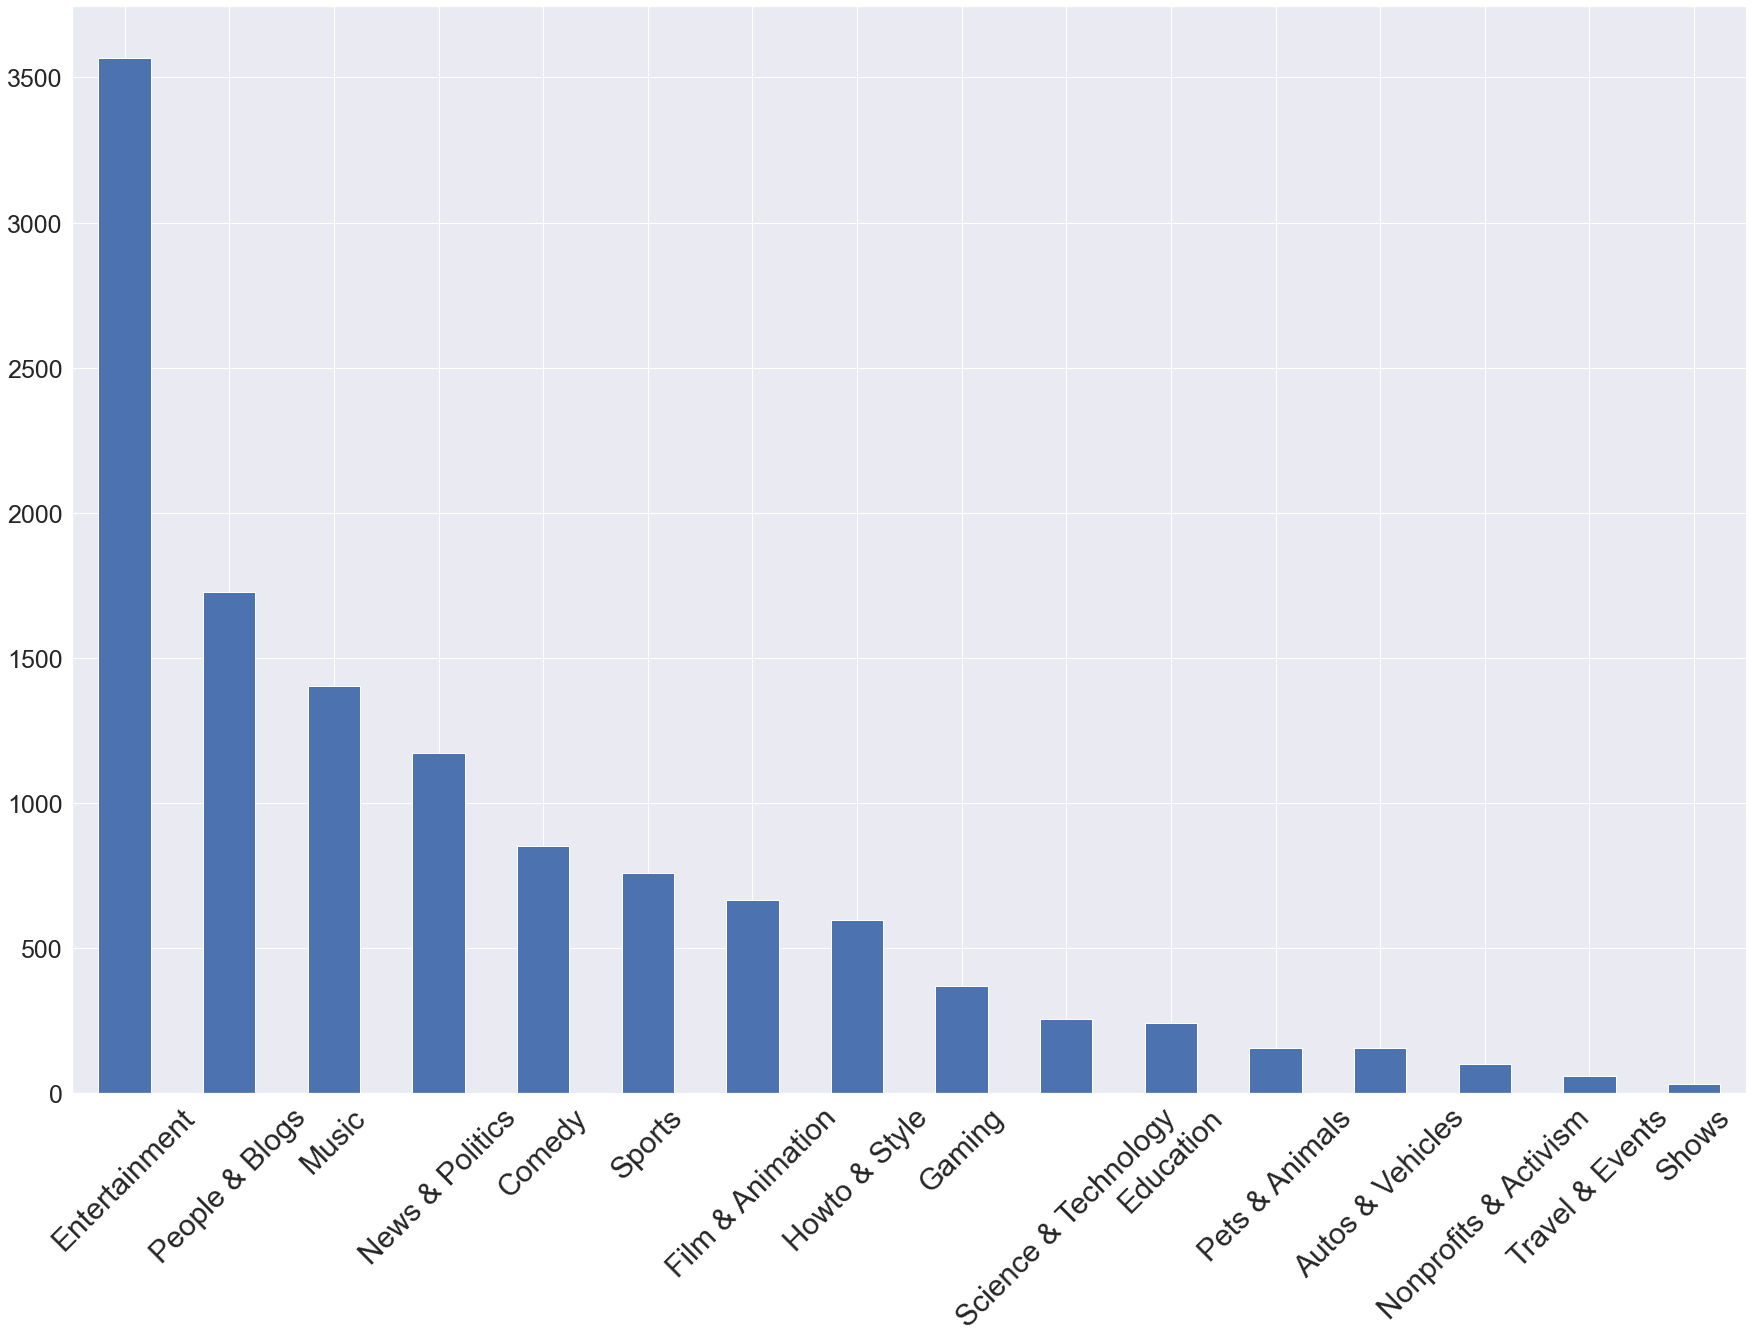

In [1007]:
visualize_genre_stats('JP')  

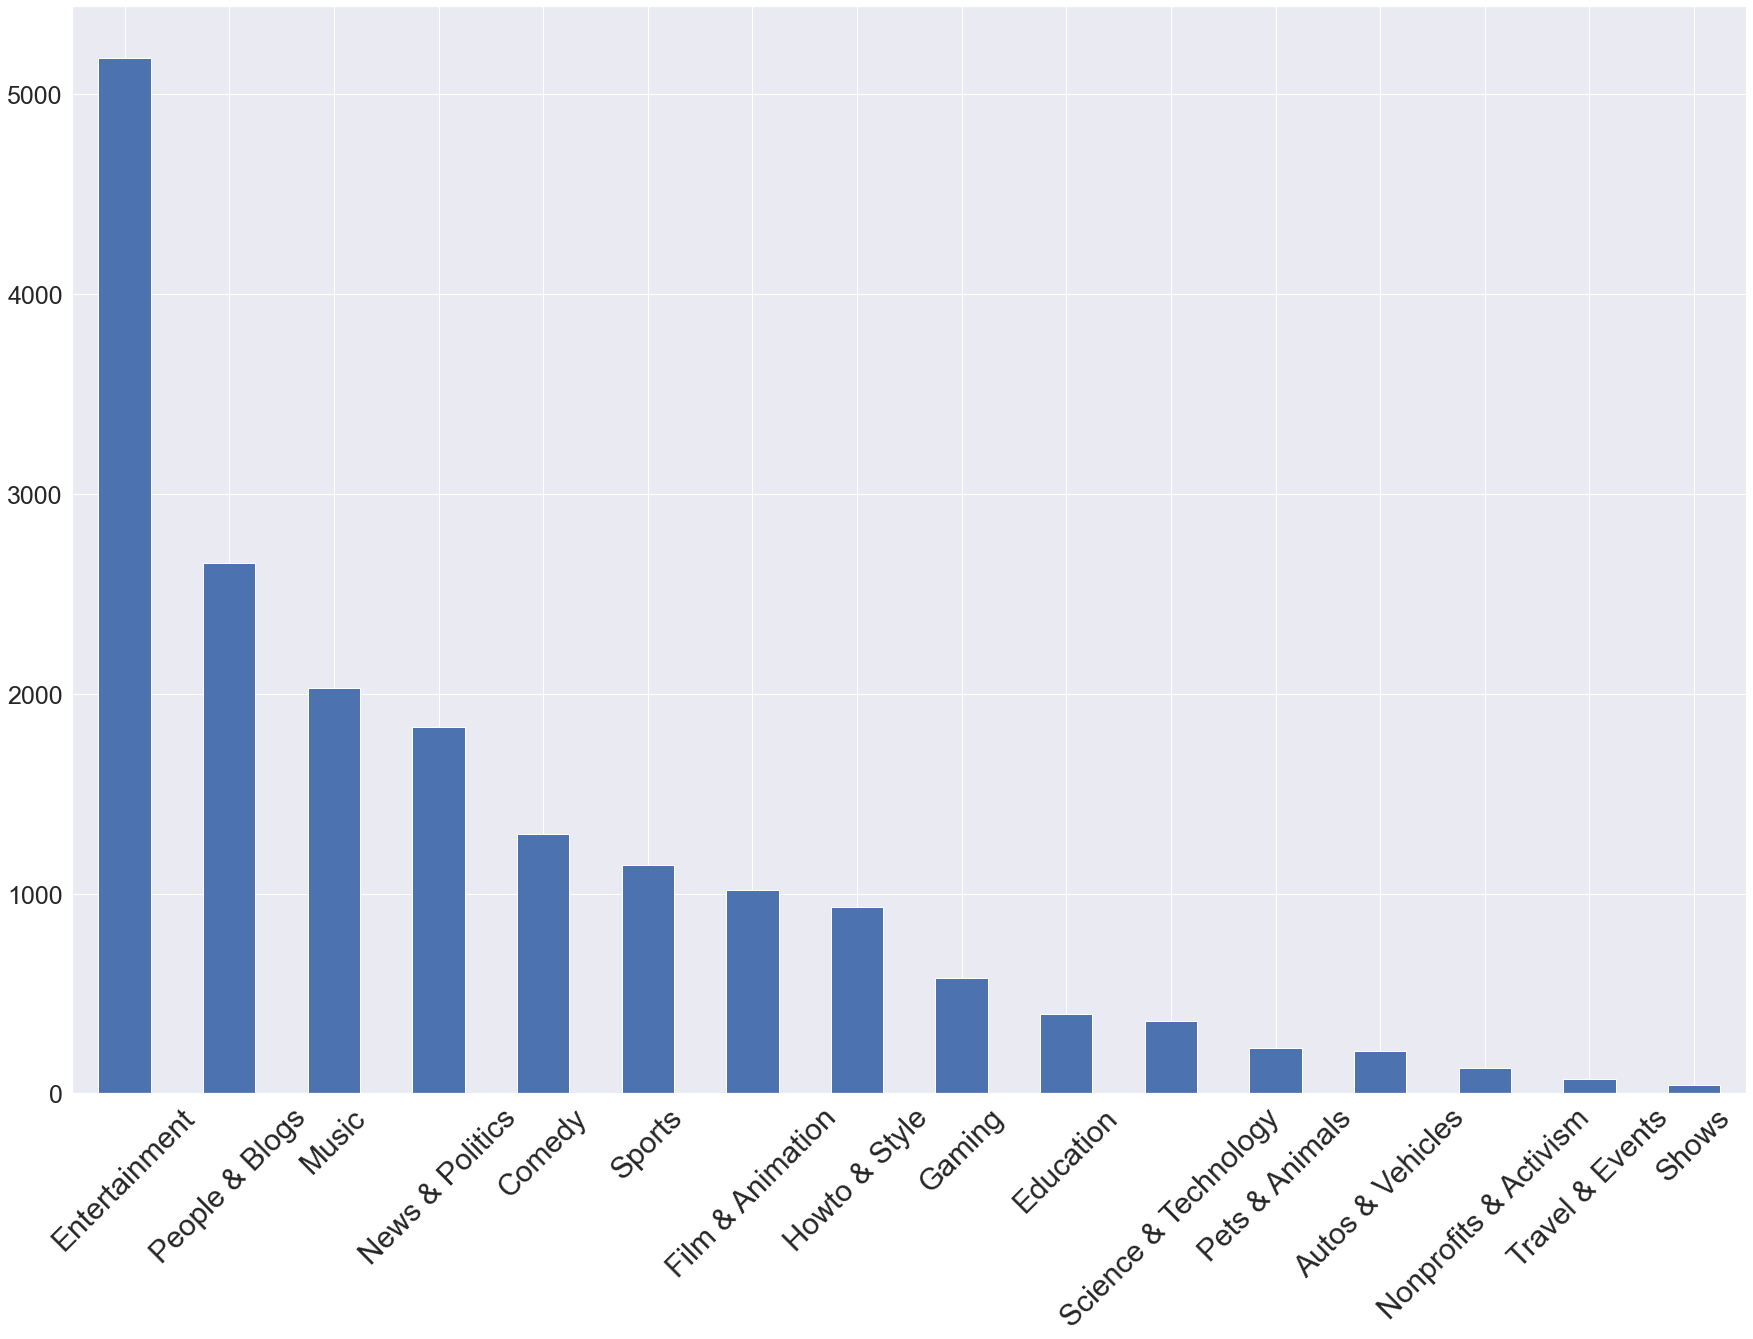

In [1008]:
visualize_genre_stats('CA')  

Алгоритмы Ютуба продвигают +- одни и те же жанры